# Economic Indicators and Speech sentiment.

After an initial foray into the market indicators, it was onto look into the less granular indicators.

Namely: CPI, GDP, Unemployment, and Wage growth.

The purpose of this notebook is to try and find any correlation or possibly causation between all the economic indicators above and the speeches made.

The output consists of multiple plots for economic indicators at different time frames, as well as for all the speeches, and also grouped into the Governor's speeches solely. It groups speeches into either positive or negative polarity and attempts to visualise any correlation between economic indicators and the speech sentiment at the time. 

In [1]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Suppress all warnings
warnings.filterwarnings("ignore")

In [2]:
# Import file
all_data = pd.read_csv('all_data.csv')

# View the dataframe
all_data

date     reference         country  \
0     1999-01-04  r981215a_BOE  United Kingdom   
1     1999-01-05  r981215a_BOE  United Kingdom   
2     1999-01-06  r981215a_BOE  United Kingdom   
3     1999-01-07  r981215a_BOE  United Kingdom   
4     1999-01-08  r981215a_BOE  United Kingdom   
...          ...           ...             ...   
6121  2022-10-14  r221012a_BOE  United Kingdom   
6122  2022-10-17  r221015a_BOE  United Kingdom   
6123  2022-10-18  r221015a_BOE  United Kingdom   
6124  2022-10-19  r221019a_BOE  United Kingdom   
6125  2022-10-20  r221020a_BOE  United Kingdom   

                                                  title     author  is_gov  \
0                                     Alice in Euroland     Buiter   False   
1                                     Alice in Euroland     Buiter   False   
2                                     Alice in Euroland     Buiter   False   
3                                     Alice in Euroland     Buiter   False   
4                                     Alice in Euroland     Buiter   False   
...                                                 ...        ...     ...   
6121    Monetary policy: an anchor in challenging times       Pill   False   
6122  Monetary policy and financial stability interv...     Bailey    True   
6123  Monetary policy and financial stability interv...     Bailey    True   
6124  Governance of â€œDecentralisedâ€ Finance: Get...    Wilkins   False   
6125       The inflationary consequences of real shocks  Broadbent   False   

      word_count body     central_bank  year  ...     ftse_100  gdp_million  \
0           4574  BOE  Bank of England  1998  ...  5879.399902       255773   
1           4574  BOE  Bank of England  1998  ...  5958.200195       255773   
2           4574  BOE  Bank of England  1998  ...  6148.799805       255773   
3           4574  BOE  Bank of England  1998  ...  6101.200195       255773   
4           4574  BOE  Bank of England  1998  ...  6147.200195       255773   
...          ...  ...              ...   ...  ...          ...          ...   
6121        3567  BOE  Bank of England  2022  ...  6858.799805       645805   
6122        1767  BOE  Bank of England  2022  ...  6920.200195       645805   
6123        1767  BOE  Bank of England  2022  ...  6936.700195       645805   
6124        5382  BOE  Bank of England  2022  ...  6925.000000       645805   
6125        6035  BOE  Bank of England  2022  ...  6943.899902       645805   

      gold_price  avg_house_price  1_mo_bond  10_yr_bond  2_yr_bond  \
0            289      72903.17681      6.023       4.287      4.899   
1            289      72903.17681      6.022       4.330      4.895   
2            290      72903.17681      6.022       4.319      4.917   
3            293      72903.17681      6.022       4.277      4.941   
4            293      72903.17681      6.019       4.252      4.810   
...          ...              ...        ...         ...        ...   
6121        1649     291193.00000      2.208       4.323      3.877   
6122        1664     291193.00000      2.106       3.981      3.559   
6123        1656     291193.00000      2.329       3.943      3.547   
6124        1634     291193.00000      2.292       3.871      3.465   
6125        1637     291193.00000      2.252       3.904      3.560   

      unemployment     usd  wage_growth  
0              6.2  1.6585          NaN  
1              6.2  1.6542          NaN  
2              6.2  1.6549          NaN  
3              6.2  1.6520          NaN  
4              6.2  1.6423          NaN  
...            ...     ...          ...  
6121           3.8  1.1170          6.6  
6122           3.8  1.1353          6.6  
6123           3.8  1.1318          6.6  
6124           3.8  1.1214          6.6  
6125           3.8  1.1233          6.6  

[6126 rows x 33 columns]

In [3]:
# Convert the date column to datetime
all_data['date'] = pd.to_datetime(all_data['date'])

# View the dataframe
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              6126 non-null   datetime64[ns]
 1   reference         6126 non-null   object        
 2   country           6126 non-null   object        
 3   title             6126 non-null   object        
 4   author            6126 non-null   object        
 5   is_gov            6126 non-null   bool          
 6   word_count        6126 non-null   int64         
 7   body              6126 non-null   object        
 8   central_bank      6126 non-null   object        
 9   year              6126 non-null   int64         
 10  language          6126 non-null   object        
 11  vader_polarity    6126 non-null   float64       
 12  lm_polarity       6126 non-null   float64       
 13  finbert_polarity  6126 non-null   float64       
 14  boe_speech        6126 n

In [4]:
# Create a new dataframe with only GDP, CPI, Unemployment and Wage growth.
eco_monthly = all_data[['date', 'cpi', 'unemployment', 'wage_growth', 'gdp_million', 'finbert_polarity']]

# View the dataframe
eco_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6126 entries, 0 to 6125
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              6126 non-null   datetime64[ns]
 1   cpi               6126 non-null   float64       
 2   unemployment      6126 non-null   float64       
 3   wage_growth       5620 non-null   float64       
 4   gdp_million       6126 non-null   int64         
 5   finbert_polarity  6126 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 287.3 KB


Since the wage growth data is available only from 2001, the initial figure was inserted into the NaN values for the preceding years. Given the broad time range under consideration and the focus on analyzing the Global Financial Crisis (GFC), these missing figures should not impede any assumptions made.

In [5]:
# Fill NaN values at the start of the peiod with the oldest collated figure
eco_monthly['wage_growth'] = eco_monthly['wage_growth'].fillna(value=3.6)

# Set 'date' as the index
eco_monthly.set_index('date', inplace=True)

# View the dataframe
eco_monthly

cpi  unemployment  wage_growth  gdp_million  finbert_polarity
date                                                                      
1999-01-04   1.6           6.2          3.6       255773         -0.007072
1999-01-05   1.6           6.2          3.6       255773         -0.007072
1999-01-06   1.6           6.2          3.6       255773         -0.007072
1999-01-07   1.6           6.2          3.6       255773         -0.007072
1999-01-08   1.6           6.2          3.6       255773         -0.007072
...          ...           ...          ...          ...               ...
2022-10-14  11.1           3.8          6.6       645805         -0.011488
2022-10-17  11.1           3.8          6.6       645805         -0.070586
2022-10-18  11.1           3.8          6.6       645805         -0.070586
2022-10-19  11.1           3.8          6.6       645805          0.000144
2022-10-20  11.1           3.8          6.6       645805          0.001301

[6126 rows x 5 columns]

In [6]:
# Filter the DataFrame for the specified GFC date range
eco_monthly_fc = eco_monthly.loc['2007-06-01':'2010-01-31']

# View the dataframe
eco_monthly_fc

cpi  unemployment  wage_growth  gdp_million  finbert_polarity
date                                                                     
2007-06-01  2.4           5.4          4.2       389228         -0.049606
2007-06-04  2.4           5.4          4.2       389228         -0.049606
2007-06-05  2.4           5.4          4.2       389228         -0.049606
2007-06-06  2.4           5.4          4.2       389228         -0.049606
2007-06-07  2.4           5.4          4.2       389228         -0.049606
...         ...           ...          ...          ...               ...
2010-01-26  3.5           8.0          1.8       396113         -0.111540
2010-01-27  3.5           8.0          1.8       396113          0.192988
2010-01-27  3.5           8.0          1.8       396113         -0.054856
2010-01-28  3.5           8.0          1.8       396113         -0.054856
2010-01-29  3.5           8.0          1.8       396113         -0.054856

[680 rows x 5 columns]

In [7]:
# Import speeches file.
speeches = pd.read_csv('all_speeches_scores_daily.csv')

# View the dataframe
speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917 entries, 0 to 8916
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              8917 non-null   object 
 1   reference         8917 non-null   object 
 2   country           8917 non-null   object 
 3   title             8917 non-null   object 
 4   author            8917 non-null   object 
 5   is_gov            8917 non-null   bool   
 6   word_count        8917 non-null   int64  
 7   Body              8917 non-null   object 
 8   central_bank      8917 non-null   object 
 9   year              8917 non-null   int64  
 10  language          8917 non-null   object 
 11  vader_polarity    8917 non-null   float64
 12  lm_polarity       8917 non-null   float64
 13  finbert_polarity  8917 non-null   float64
dtypes: bool(1), float64(3), int64(2), object(8)
memory usage: 914.5+ KB


In [8]:
# Convert the date column to datetime
speeches['date'] = pd.to_datetime(speeches['date'])

# View the dataframe
speeches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8917 entries, 0 to 8916
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              8917 non-null   datetime64[ns]
 1   reference         8917 non-null   object        
 2   country           8917 non-null   object        
 3   title             8917 non-null   object        
 4   author            8917 non-null   object        
 5   is_gov            8917 non-null   bool          
 6   word_count        8917 non-null   int64         
 7   Body              8917 non-null   object        
 8   central_bank      8917 non-null   object        
 9   year              8917 non-null   int64         
 10  language          8917 non-null   object        
 11  vader_polarity    8917 non-null   float64       
 12  lm_polarity       8917 non-null   float64       
 13  finbert_polarity  8917 non-null   float64       
dtypes: bool(1), datetime64[n

The all_data file has all the FinBERT polarity scores forward filled, creating speech data for every day. Upon importing the all_speeches_scores_daily.csv file, which contains finalized NLP polarity scores, to compile monthly averages later, a dataframe containing only the specific speech dates will be required.

Firstly, lets have a look at the four economic indicators along with the FinBERT speech polarity scores in the GFC period which was designated as June 2007 until Jan 2010.

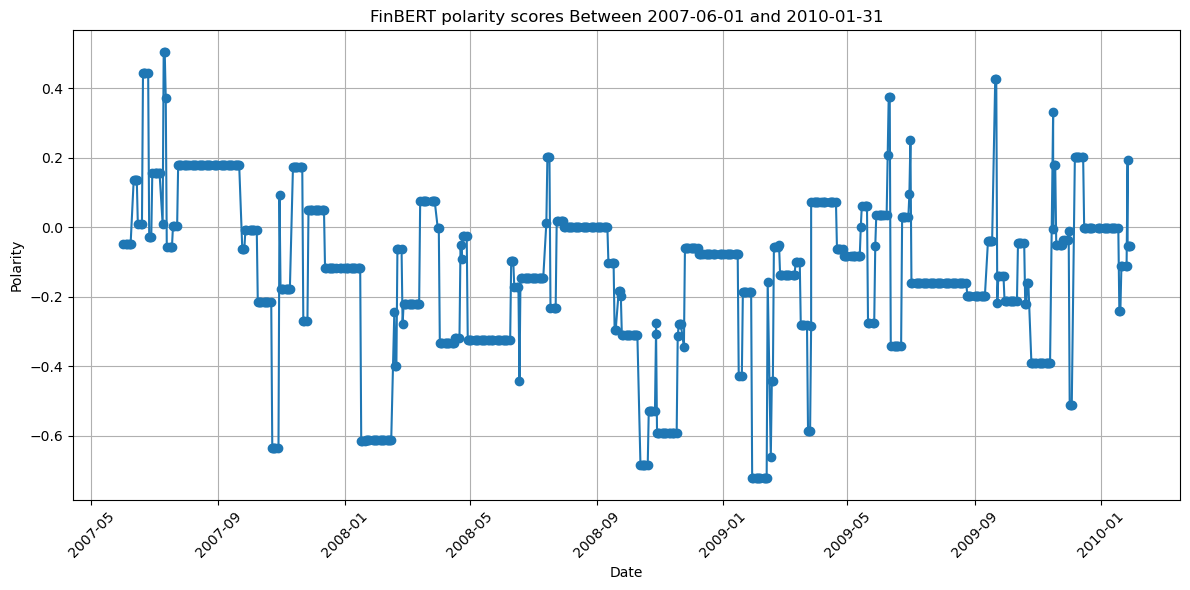

In [9]:
# Filter dataframe for FinBERT polarity based on date range
fin_fc = eco_monthly_fc.loc['2007-06-01':'2010-01-31']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(fin_fc.index, fin_fc['finbert_polarity'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('FinBERT polarity scores Between 2007-06-01 and 2010-01-31')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

At first glance, the speeches appear to exhibit significant variation, reflecting the turbulence of the period, with a tendency towards negativity. This is unsurprising given the economic conditions of the time.

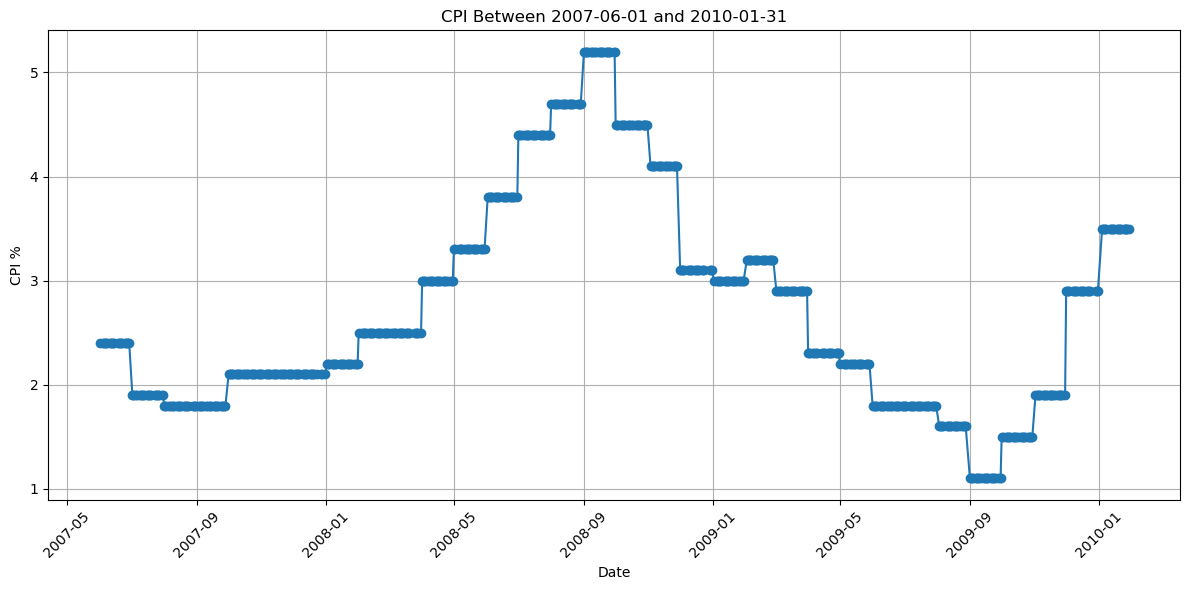

In [10]:
# Filter dataframe for CPI based on date range
cpi_fc = eco_monthly_fc.loc['2007-06-01':'2010-01-31']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(cpi_fc.index, cpi_fc['cpi'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('CPI %')
plt.title('CPI Between 2007-06-01 and 2010-01-31')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The CPI rises to well over 5% in the middle of the period but also drops below the 2% goal, indicating a period characterized by both rising and falling inflation, which is quite interesting.

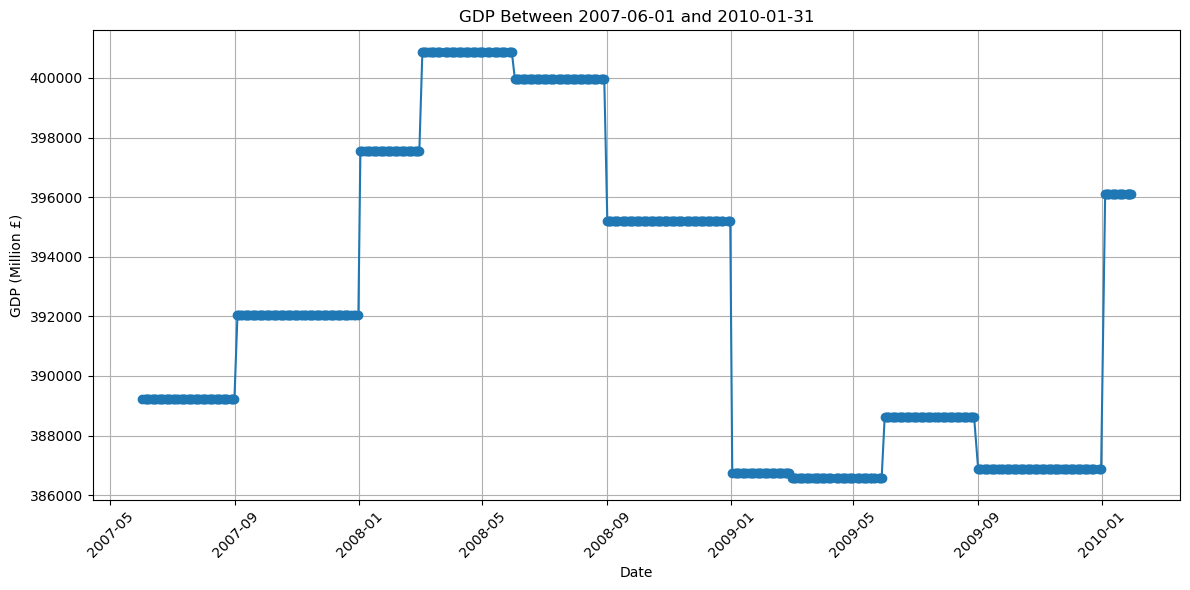

In [11]:
# Filter dataframe for GDP based on date range
gdp_fc = eco_monthly_fc.loc['2007-06-01':'2010-01-31']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(gdp_fc.index, gdp_fc['gdp_million'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('GDP (Million £)')
plt.title('GDP Between 2007-06-01 and 2010-01-31')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

GDP experienced a significant drop during this period, for reasons that are quite obvious.

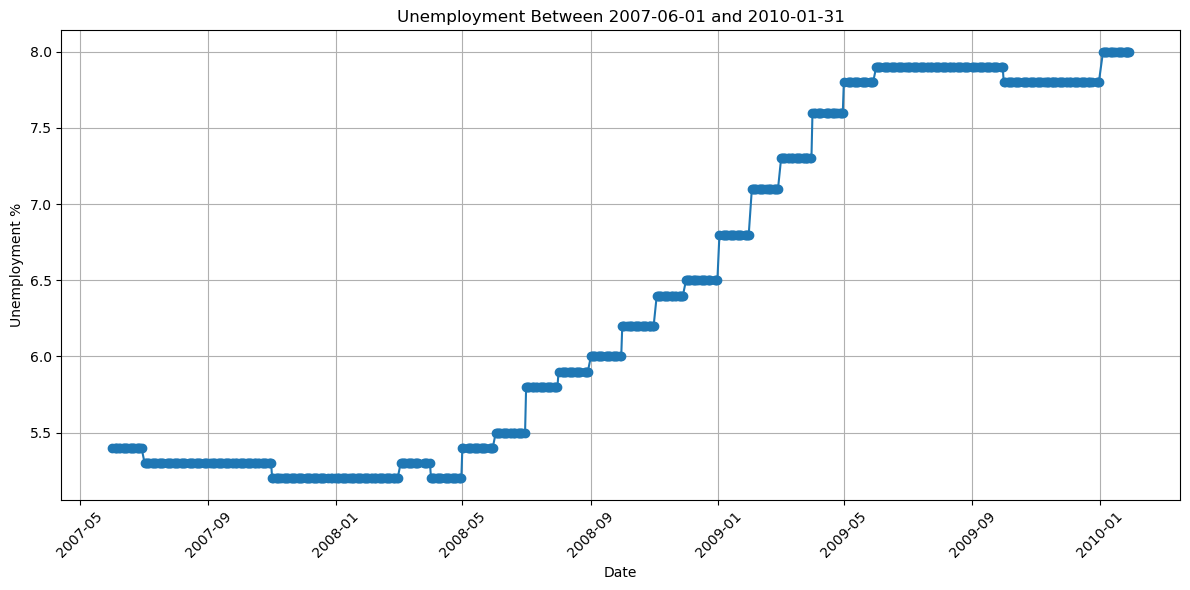

In [12]:
# Filter dataframe Unemployment based on date range
unemployment_fc = eco_monthly_fc.loc['2007-06-01':'2010-01-31']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(unemployment_fc.index, unemployment_fc['unemployment'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Unemployment %')
plt.title('Unemployment Between 2007-06-01 and 2010-01-31')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Unemployment during the period as expected rose consistently.

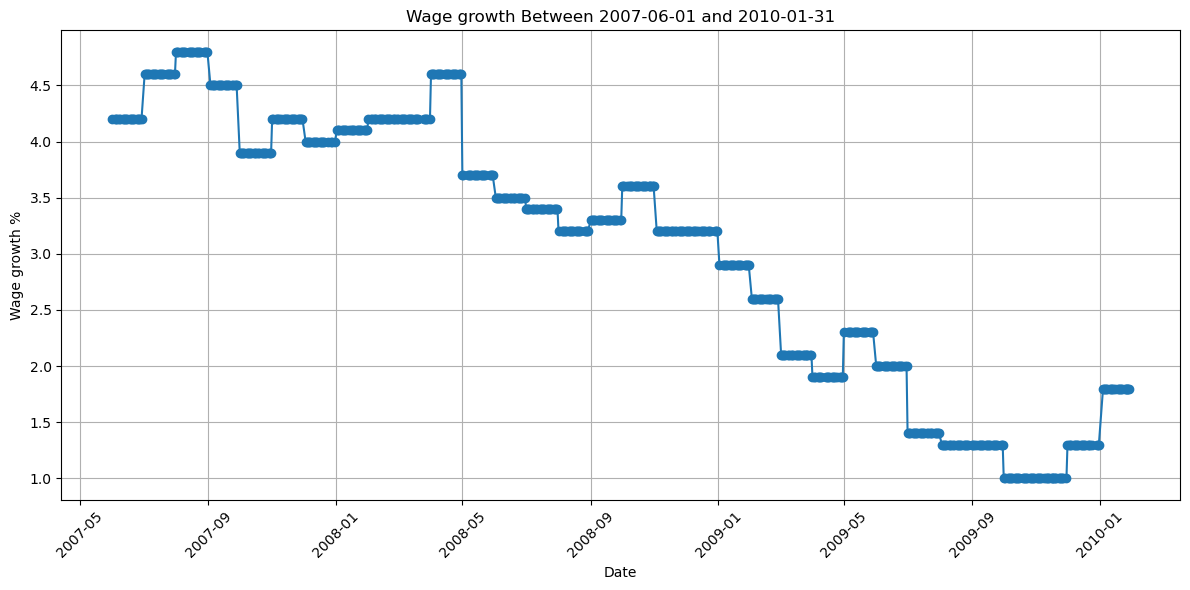

In [13]:
# Filter dataframe for Wage growth based on date range
wages_fc = eco_monthly_fc.loc['2007-06-01':'2010-01-31']

# Create the plot
plt.figure(figsize=(12, 6))
plt.plot(wages_fc.index, wages_fc['wage_growth'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Wage growth %')
plt.title('Wage growth Between 2007-06-01 and 2010-01-31')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Inversely, wage growth declined as the job market became saturated with individuals seeking employment, resulting in reduced bargaining power for higher wages.

For a better look then a plot with them all together would be better.

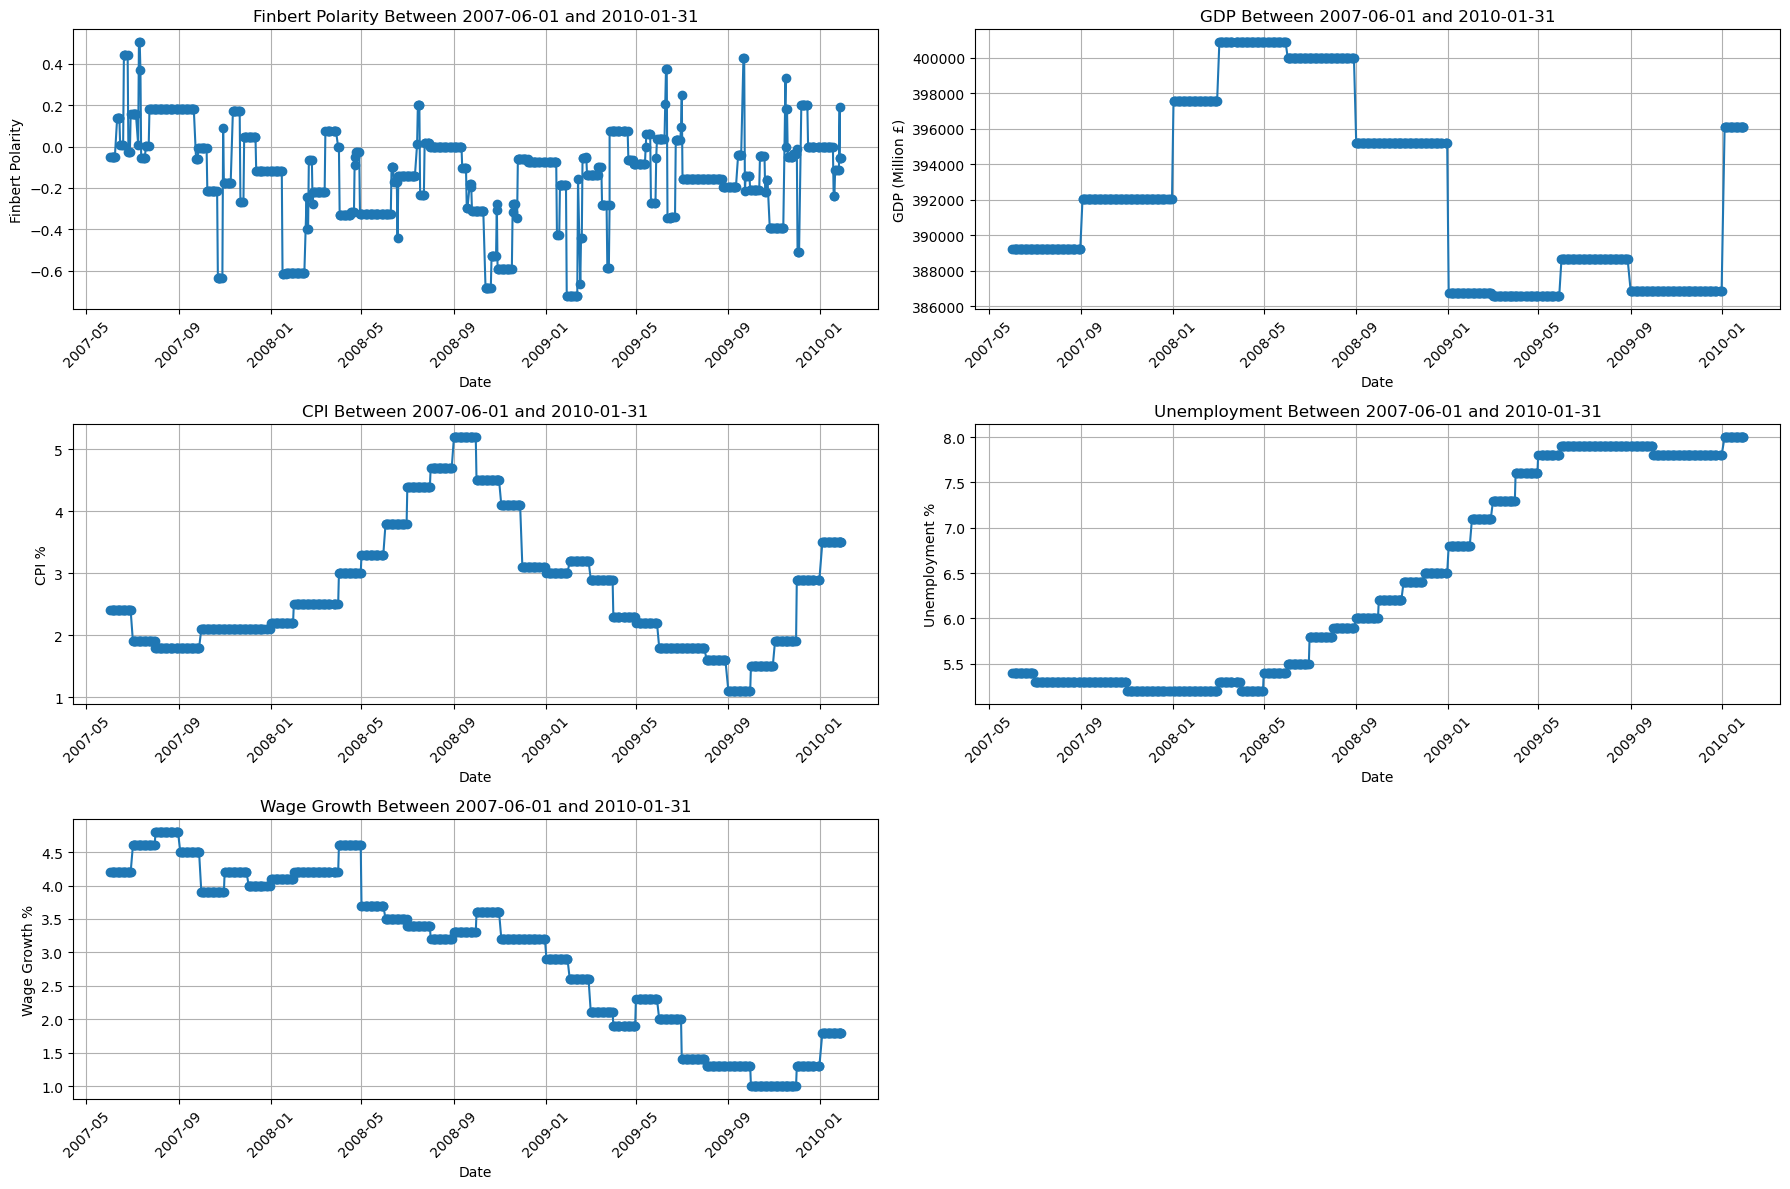

In [14]:
# Filter dataframe based on date range
date_range_start = '2007-06-01'
date_range_end = '2010-01-31'
df_filtered = eco_monthly_fc.loc[date_range_start:date_range_end]

# Create figure and subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 12))

# Plot finbert_polarity
axes[0, 0].plot(df_filtered.index, df_filtered['finbert_polarity'], marker='o', linestyle='-')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Finbert Polarity')
axes[0, 0].set_title('Finbert Polarity Between 2007-06-01 and 2010-01-31')
axes[0, 0].grid(True)
axes[0, 0].tick_params(axis='x', rotation=45)

# Plot GDP
axes[0, 1].plot(df_filtered.index, df_filtered['gdp_million'], marker='o', linestyle='-')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_ylabel('GDP (Million £)')
axes[0, 1].set_title('GDP Between 2007-06-01 and 2010-01-31')
axes[0, 1].grid(True)
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot CPI
axes[1, 0].plot(df_filtered.index, df_filtered['cpi'], marker='o', linestyle='-')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('CPI %')
axes[1, 0].set_title('CPI Between 2007-06-01 and 2010-01-31')
axes[1, 0].grid(True)
axes[1, 0].tick_params(axis='x', rotation=45)

# Plot Unemployment
axes[1, 1].plot(df_filtered.index, df_filtered['unemployment'], marker='o', linestyle='-')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Unemployment %')
axes[1, 1].set_title('Unemployment Between 2007-06-01 and 2010-01-31')
axes[1, 1].grid(True)
axes[1, 1].tick_params(axis='x', rotation=45)

# Plot Wage growth
axes[2, 0].plot(df_filtered.index, df_filtered['wage_growth'], marker='o', linestyle='-')
axes[2, 0].set_xlabel('Date')
axes[2, 0].set_ylabel('Wage Growth %')
axes[2, 0].set_title('Wage Growth Between 2007-06-01 and 2010-01-31')
axes[2, 0].grid(True)
axes[2, 0].tick_params(axis='x', rotation=45)

# Hide the empty subplot
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

So, plotting all of them together, it doesn't appear to show any significant correlation between the sentiment of the speeches and the movements in the economic indicators.

In [15]:
# Create a new dataframe for speeches with only finbert_polarity
fin_speech = speeches[['date', 'finbert_polarity']]

# View the dataframe
fin_speech

date  finbert_polarity
0    1998-09-15         -0.269212
1    1998-09-16         -0.269212
2    1998-09-17         -0.269212
3    1998-09-18         -0.269212
4    1998-09-19         -0.269212
...         ...               ...
8912 2022-10-16         -0.070586
8913 2022-10-17         -0.070586
8914 2022-10-18         -0.070586
8915 2022-10-19          0.000144
8916 2022-10-20          0.001301

[8917 rows x 2 columns]

In [16]:
# Remove duplicate rows based on 'finbert_polarity' and keep the first date with each unique value
fin_speech_unique = fin_speech.drop_duplicates(subset=['finbert_polarity'], keep='first')

# Set 'date' as the index of the dataframe
fin_speech_unique.set_index('date', inplace=True)

# View the DataFrame
fin_speech_unique

finbert_polarity
date                        
1998-09-15         -0.269212
1998-10-21          0.331056
1998-10-21         -0.638454
1998-11-01         -0.000118
1998-11-01         -0.002259
...                      ...
2022-10-07         -0.143693
2022-10-12         -0.011488
2022-10-15         -0.070586
2022-10-19          0.000144
2022-10-20          0.001301

[1202 rows x 1 columns]

Dataframe created with just the speech dates and the corresponing FinBERT polarity scores for a more granular and accurate view.

Focused on extreme positivity or negativity in the speeches, the highest and lowest 20 FinBERT polarity scores from the GFC were grouped.

In [17]:
# Define the start and end dates
start_date = '2007-06-01'
end_date = '2010-01-31'

# Filter the DataFrame based on the date range and sort by 'finbert_polarity'
fin_spikes_sorted = fin_speech_unique.loc[(fin_speech_unique.index >= start_date) & (fin_speech_unique.index <= end_date)]
fin_spikes_sorted = fin_spikes_sorted.sort_values(by='finbert_polarity')

# Get the highest 20 and lowest 20 values of 'finbert_polarity'
top_20 = fin_spikes_sorted.tail(20)
bottom_20 = fin_spikes_sorted.head(20)

# Concatenate the two DataFrames
fin_spikes = pd.concat([top_20, bottom_20])

# View the DataFrame
fin_spikes.head()

finbert_polarity
date                        
2009-03-27          0.073583
2008-03-14          0.076137
2007-10-30          0.091616
2009-06-30          0.095237
2007-06-11          0.136193

In [18]:
# Sort the dataframe by date
fin_spikes = fin_spikes.sort_values(by='date')

# View the dataframe
fin_spikes.head()

finbert_polarity
date                        
2007-06-11          0.136193
2007-06-20          0.443240
2007-06-29          0.156303
2007-07-10          0.505795
2007-07-12          0.371704

An exploratory look at the highest and lowest speeches vs CPI

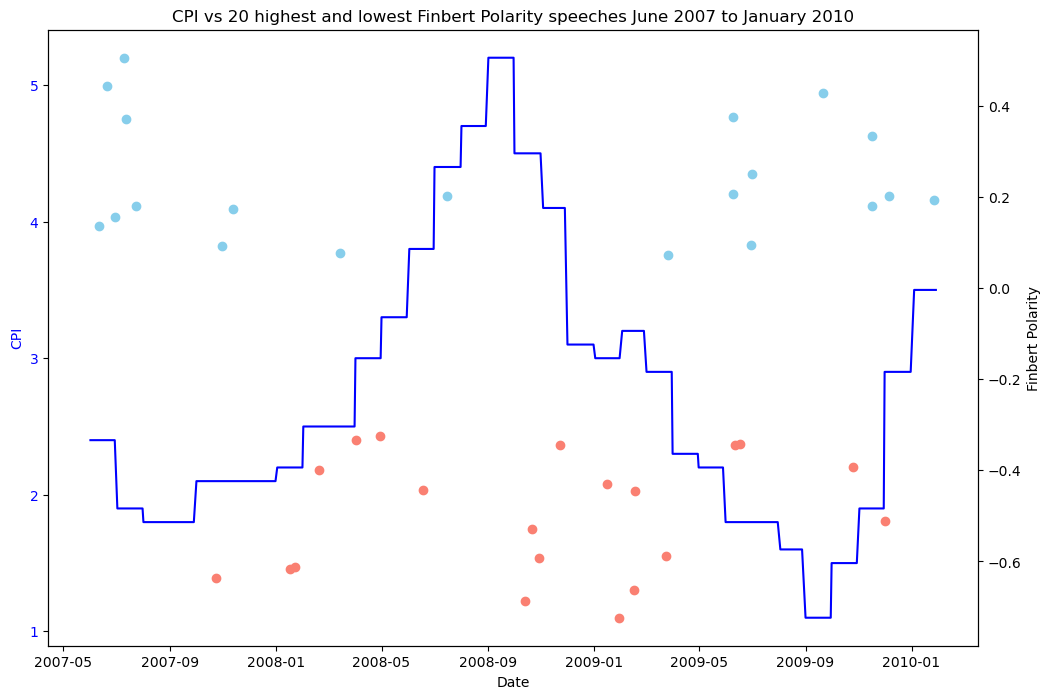

In [19]:
# Create figure and primary axis
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot 'cpi' on the primary axis
ax1.plot(eco_monthly_fc.index, eco_monthly_fc['cpi'], color='blue', label='CPI')
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary axis
ax2 = ax1.twinx()

# Plot 'finbert_polarity' on the secondary axis
for index, row in fin_spikes.iterrows():
    color = 'salmon' if row['finbert_polarity'] < 0 else 'skyblue'
    ax2.scatter(index, row['finbert_polarity'], color=color)

# Set y-axis label for 'finbert_polarity'
ax2.set_ylabel('Finbert Polarity', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Show plot
plt.title('CPI vs 20 highest and lowest Finbert Polarity speeches June 2007 to January 2010')
plt.show()

A definite period of negative speeches in the middle of the period that coincides with both rising and falling CPI which makes it seem like the CPI is not fluctuating due to the speech sentiment at the time.

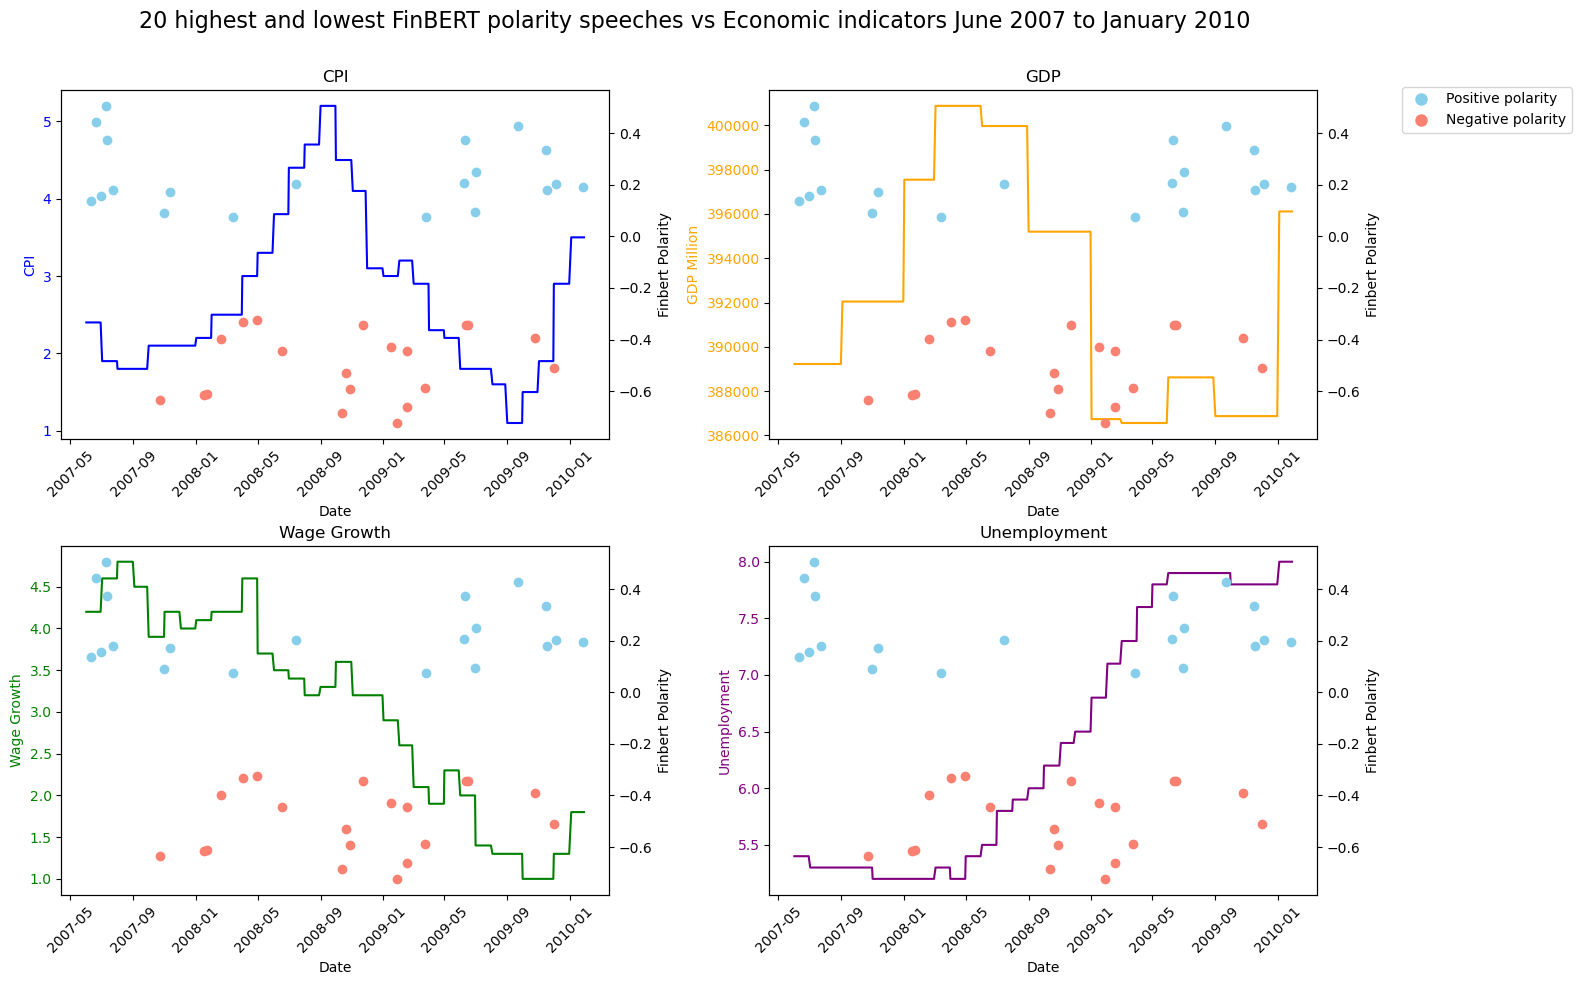

In [20]:
# Create a figure and primary axis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# Plot CPI on the primary axis
ax1 = axes[0, 0]
ax1.plot(eco_monthly_fc.index, eco_monthly_fc['cpi'], color='blue', label='CPI')
ax1.set_xlabel('Date')
ax1.set_ylabel('CPI', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('CPI')

# Create a secondary axis for FinBERT polarity
ax2 = ax1.twinx()
for index, row in fin_spikes.iterrows():
    color = 'salmon' if row['finbert_polarity'] < 0 else 'skyblue'
    ax2.scatter(index, row['finbert_polarity'], color=color)
ax2.set_ylabel('Finbert Polarity', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Plot GDP on the primary axis
ax3 = axes[0, 1]
ax3.plot(eco_monthly_fc.index, eco_monthly_fc['gdp_million'], color='orange', label='GDP Million')
ax3.set_xlabel('Date')
ax3.set_ylabel('GDP Million', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')
ax3.set_title('GDP')

# Create a secondary axis for FinBERT polarity
ax4 = ax3.twinx()
for index, row in fin_spikes.iterrows():
    color = 'salmon' if row['finbert_polarity'] < 0 else 'skyblue'
    ax4.scatter(index, row['finbert_polarity'], color=color)
ax4.set_ylabel('Finbert Polarity', color='black')
ax4.tick_params(axis='y', labelcolor='black')

# Plot Wage growth on the primary axis
ax5 = axes[1, 0]
ax5.plot(eco_monthly_fc.index, eco_monthly_fc['wage_growth'], color='green', label='Wage Growth')
ax5.set_xlabel('Date')
ax5.set_ylabel('Wage Growth', color='green')
ax5.tick_params(axis='y', labelcolor='green')
ax5.set_title('Wage Growth')

# Create a secondary axis for FinBERT polarity
ax6 = ax5.twinx()
for index, row in fin_spikes.iterrows():
    color = 'salmon' if row['finbert_polarity'] < 0 else 'skyblue'
    ax6.scatter(index, row['finbert_polarity'], color=color)
ax6.set_ylabel('Finbert Polarity', color='black')
ax6.tick_params(axis='y', labelcolor='black')

# Plot Unemployment on the primary axis
ax7 = axes[1, 1]
ax7.plot(eco_monthly_fc.index, eco_monthly_fc['unemployment'], color='purple', label='Unemployment')
ax7.set_xlabel('Date')
ax7.set_ylabel('Unemployment', color='purple')
ax7.tick_params(axis='y', labelcolor='purple')
ax7.set_title('Unemployment')

# Create a secondary axis for FinBERT polarity
ax8 = ax7.twinx()
for index, row in fin_spikes.iterrows():
    color = 'salmon' if row['finbert_polarity'] < 0 else 'skyblue'
    ax8.scatter(index, row['finbert_polarity'], color=color)
ax8.set_ylabel('Finbert Polarity', color='black')
ax8.tick_params(axis='y', labelcolor='black')

# Rotate x-axis tick labels by 45 degrees
for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Add a common title with a larger font size
plt.suptitle('20 highest and lowest FinBERT polarity speeches vs Economic indicators June 2007 to January 2010', fontsize=16)

# Adjust the spacing between the main title and subplots
plt.subplots_adjust(top=0.9)

# Create custom legend handles and labels
red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')

# Add legend to the right of the top right plot, outside the plots
fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1, 0.91))

# Show plot
plt.show()

There doesn't seem to be any pattern indicating that positive speeches correlate with positive economic indicators and negative speeches with negative indicators; they appear to occur independently of each other.

A function was created to compare monthly average FinBERT polarity scores, enabling analysis across various time frames for easier viewing. With the majority of the data being monthly, this ensures consistency. The function enables the exploration of any date.

In [21]:
# Create a function to compare the monthly average FinBERT scores with the economic indicators
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['cpi', 'gdp_million', 'unemployment', 'wage_growth']
    colors = ['blue', 'orange', 'purple', 'black']

    # Define y-axis labels
    y_labels = ['CPI %', 'GDP (million £)', 'Unemployment %', 'Wage growth %']

    # Plot each eco indicator against FinBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Create secondary y-axis for FinBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot the monthly average FinBERT polarity
        for date, row in monthly_finbert_polarity_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot titles
    axs[0, 0].set_title('CPI')
    axs[0, 1].set_title('GDP')
    axs[1, 0].set_title('Unemployment')
    axs[1, 1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT monthly average polarity scores vs Economic indicators for {start_date} to {end_date}', fontsize=16)

    # Adjust the spacing between the main title and subplots
    plt.subplots_adjust(top=0.9)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

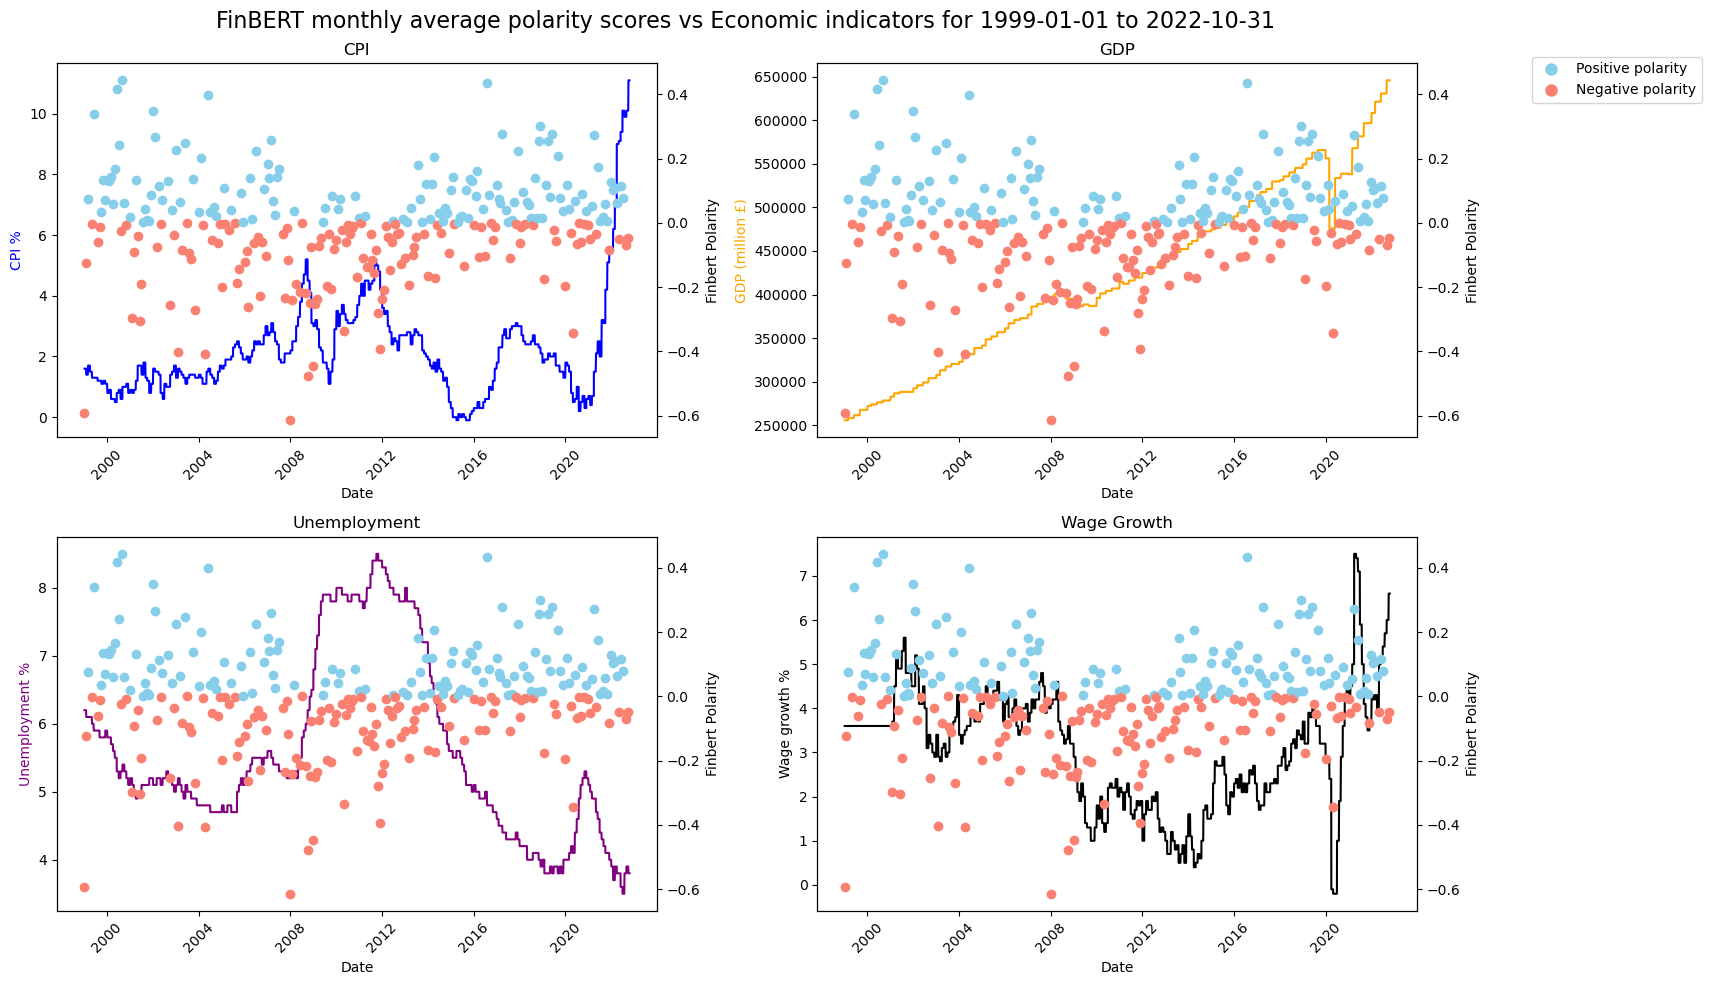

In [22]:
# Set the date range required
start_date = '1999-01-01'
end_date = '2022-10-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

In [23]:
# Save the plot
plt.savefig('plot1.png')

<Figure size 640x480 with 0 Axes>

The data from the whole period of 1999 to 2022 showed around the GFC period and afterwards, the sentiment was generally more negative and around 2016 was more on the positive side. I can't assume the sentiment as being a factor in the changes in the indicators from this though as there is a broad spread of both positive and negative months throughout. The major standout is the high unemployment period in the middle of the plot corresponding to negative sentiment in the speeches.

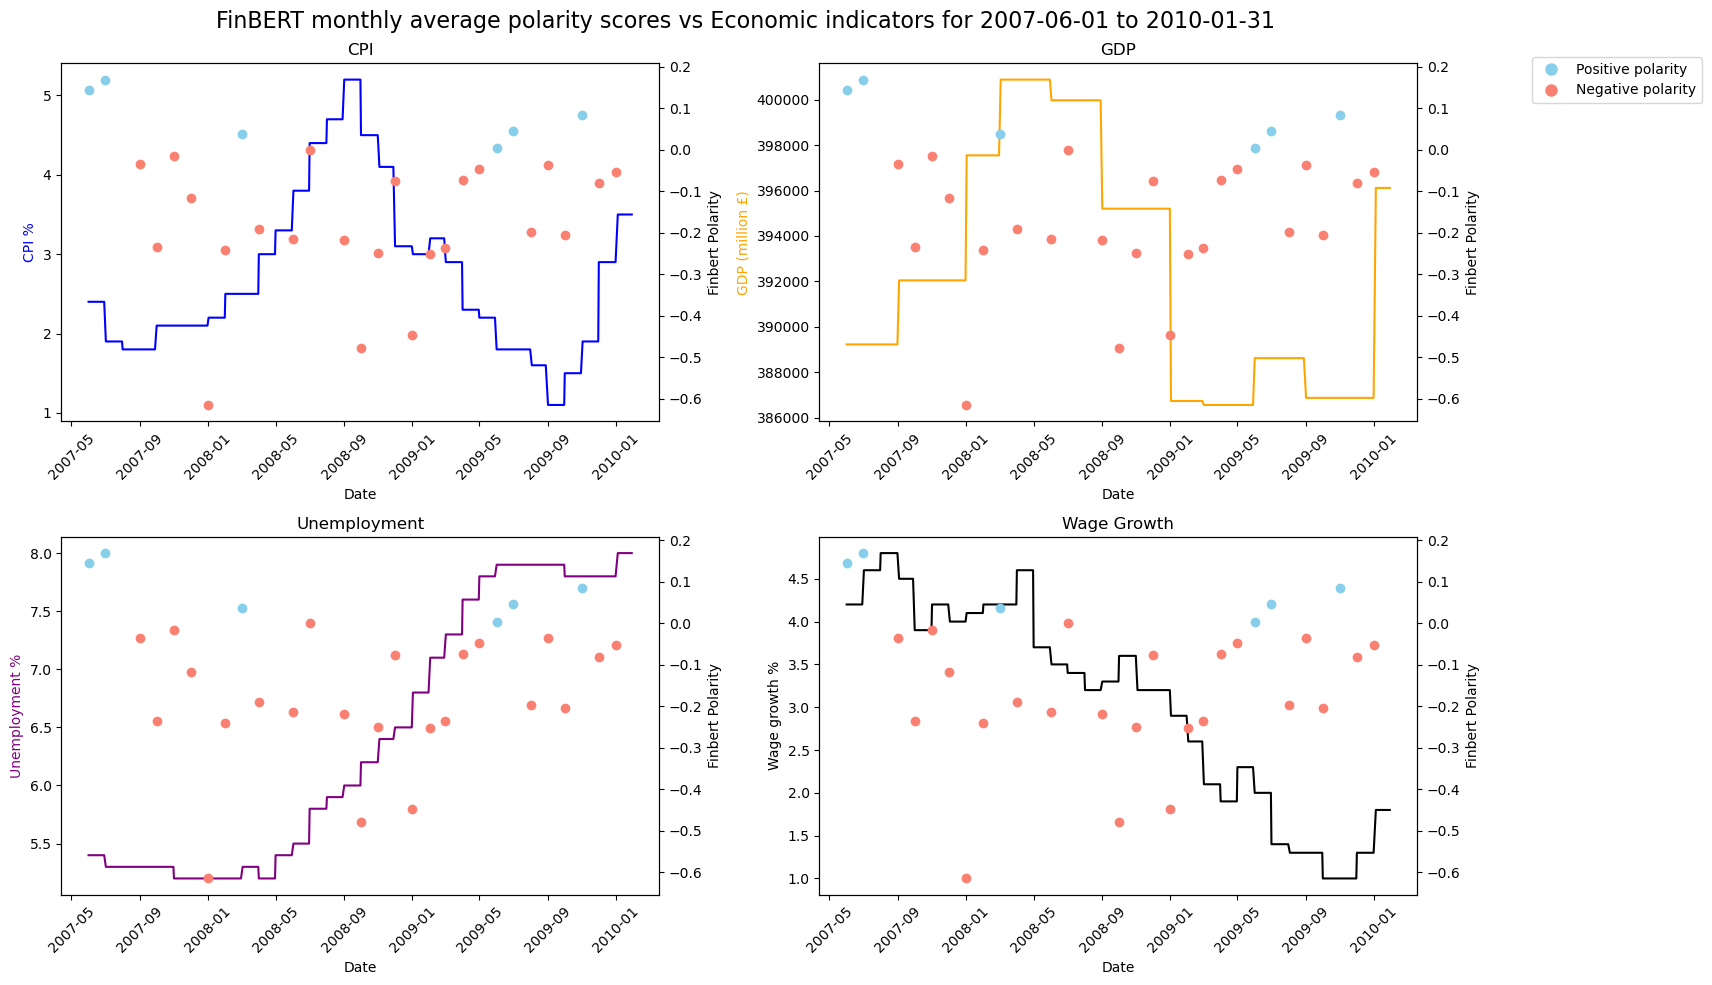

In [24]:
# Set the date range required
start_date = '2007-06-01'
end_date = '2010-01-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

In [25]:
# Save the plot
plt.savefig('line_plot2.png')

<Figure size 640x480 with 0 Axes>

Looking at the GFC with sentiment overall being negative there still doesn't seem to be any correlation.

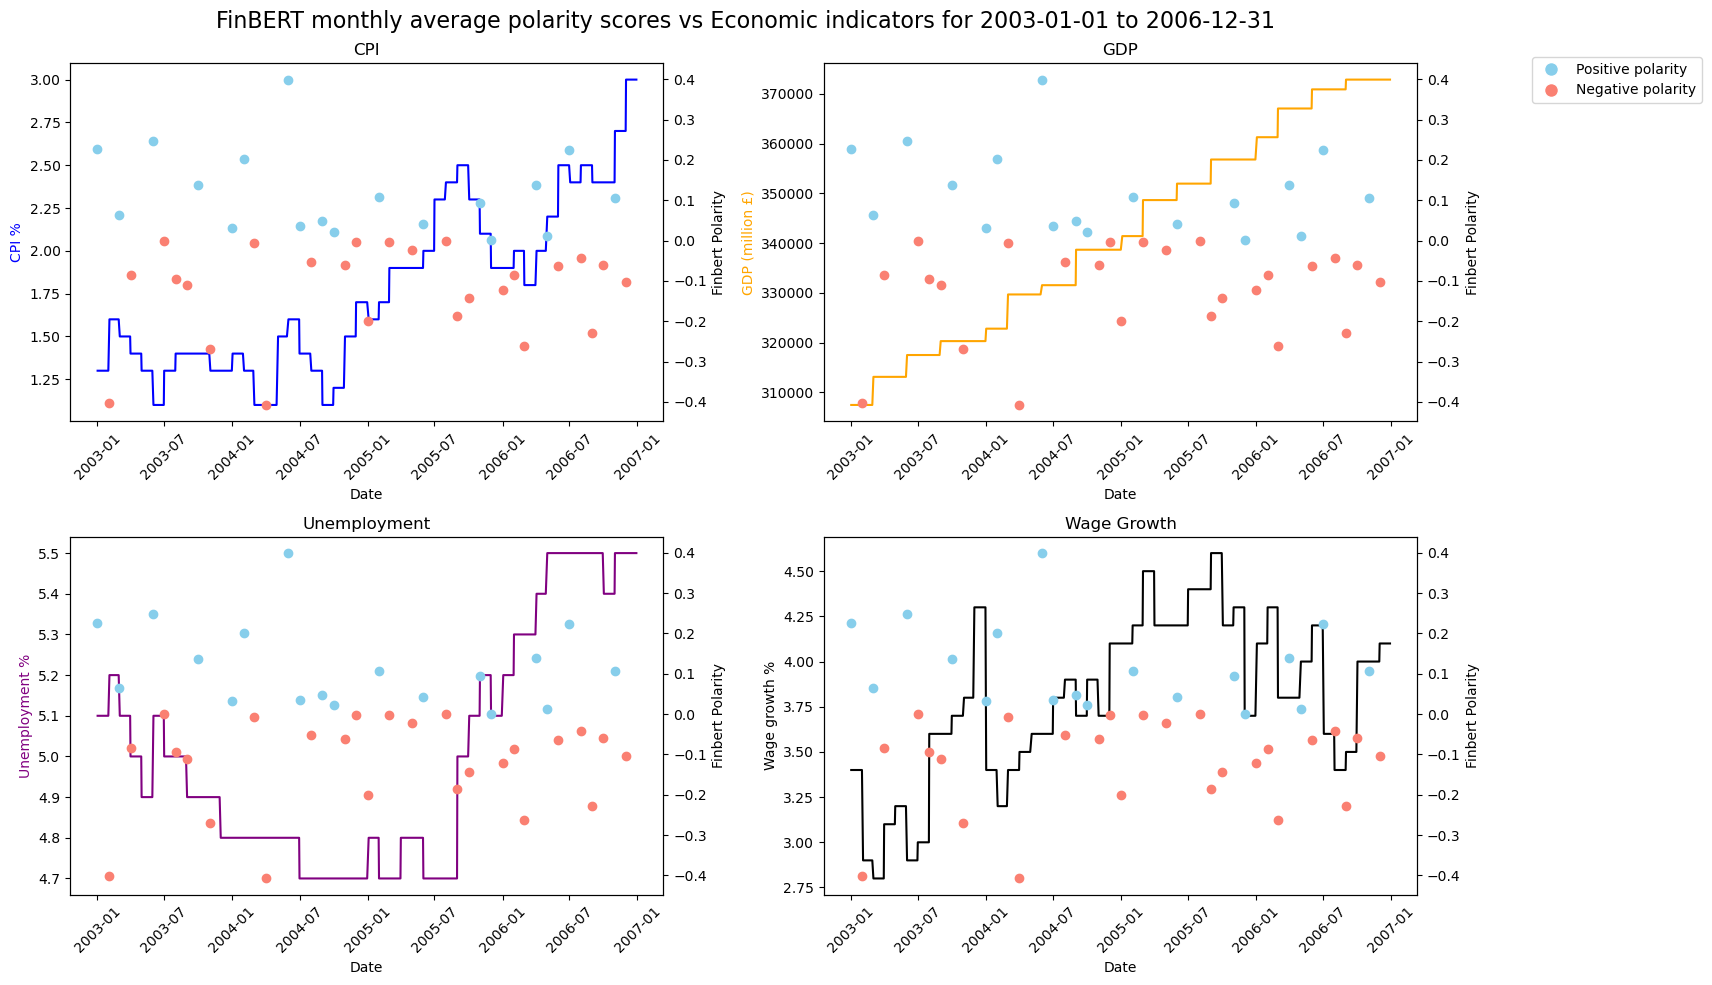

In [26]:
# Set the date range required
start_date = '2003-01-01'
end_date = '2006-12-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

In [27]:
# Save the plot
plt.savefig('line_plot3.png')

<Figure size 640x480 with 0 Axes>

Termed the Golden Age in our research, this was a period of relative economic stability and growth. It's clear that speeches scored higher more often than the GFC, but there is still an even spread of positive and negative months.

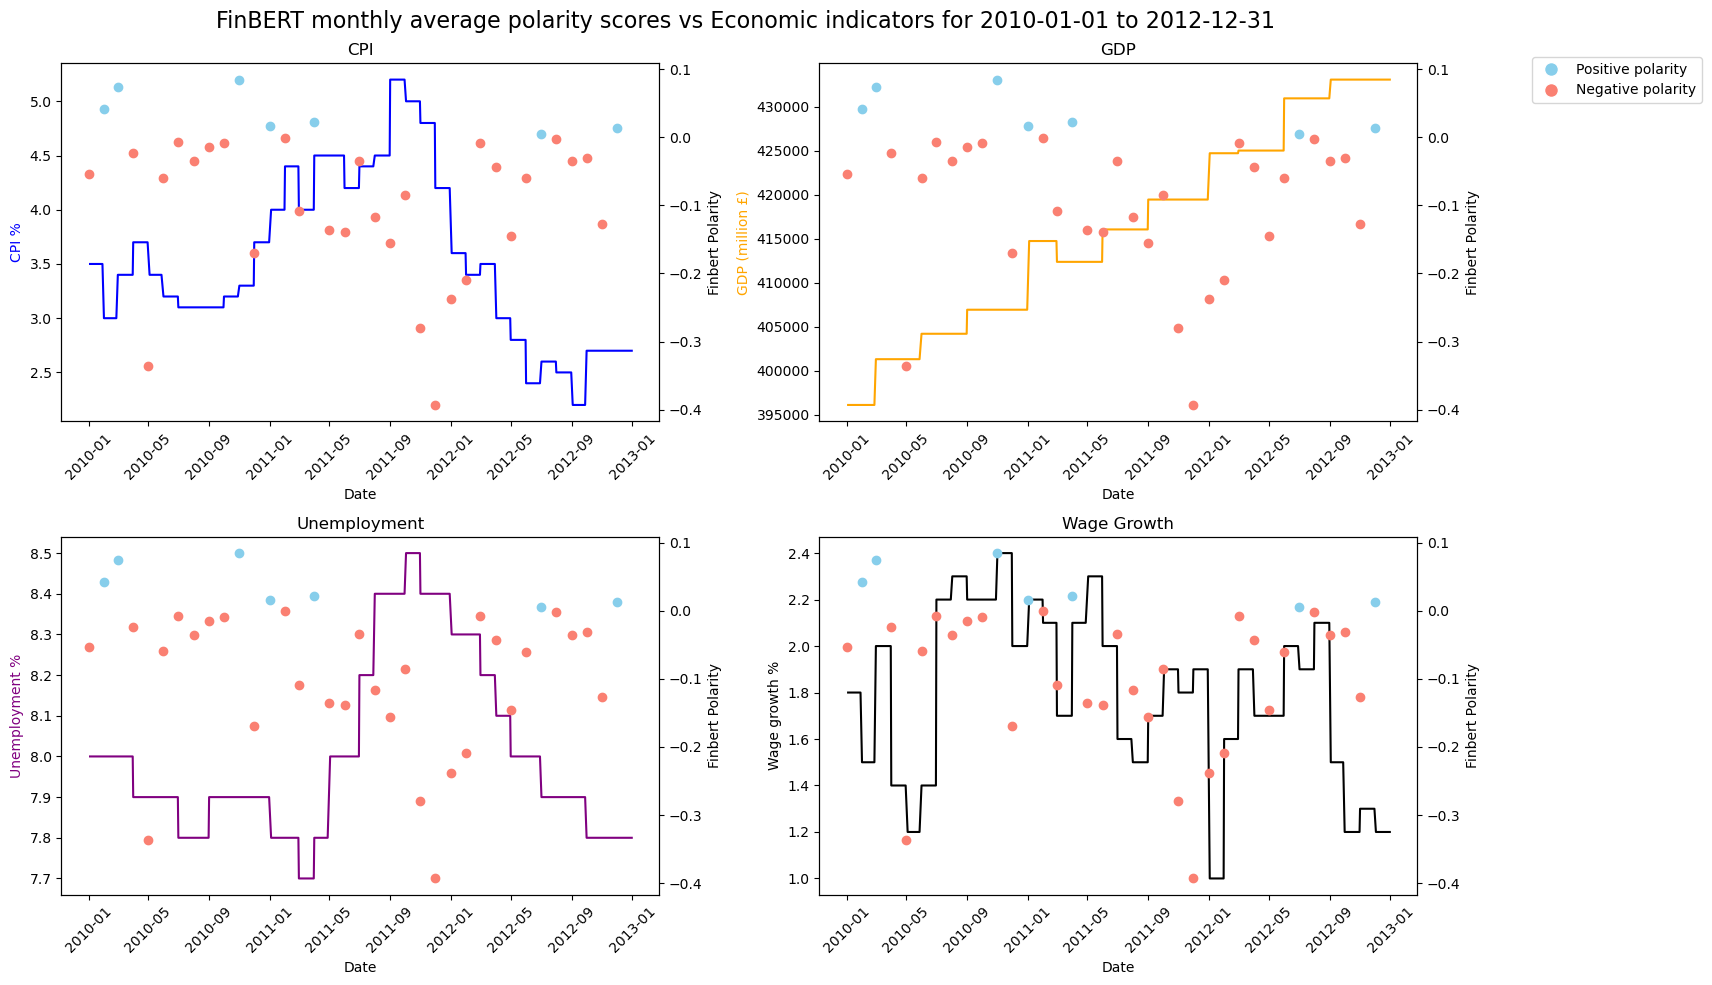

In [28]:
# Set the date range required
start_date = '2010-01-01'
end_date = '2012-12-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

Lastly, a final look at a period of time we termed the Slough of Despond, where austerity measures were in place in an attempt to reduce the deficit. Certainly, there are more negative months overall, but the majority are not significantly negative. Among them, there are also positive months, and they do not suggest an influence on the indicators.

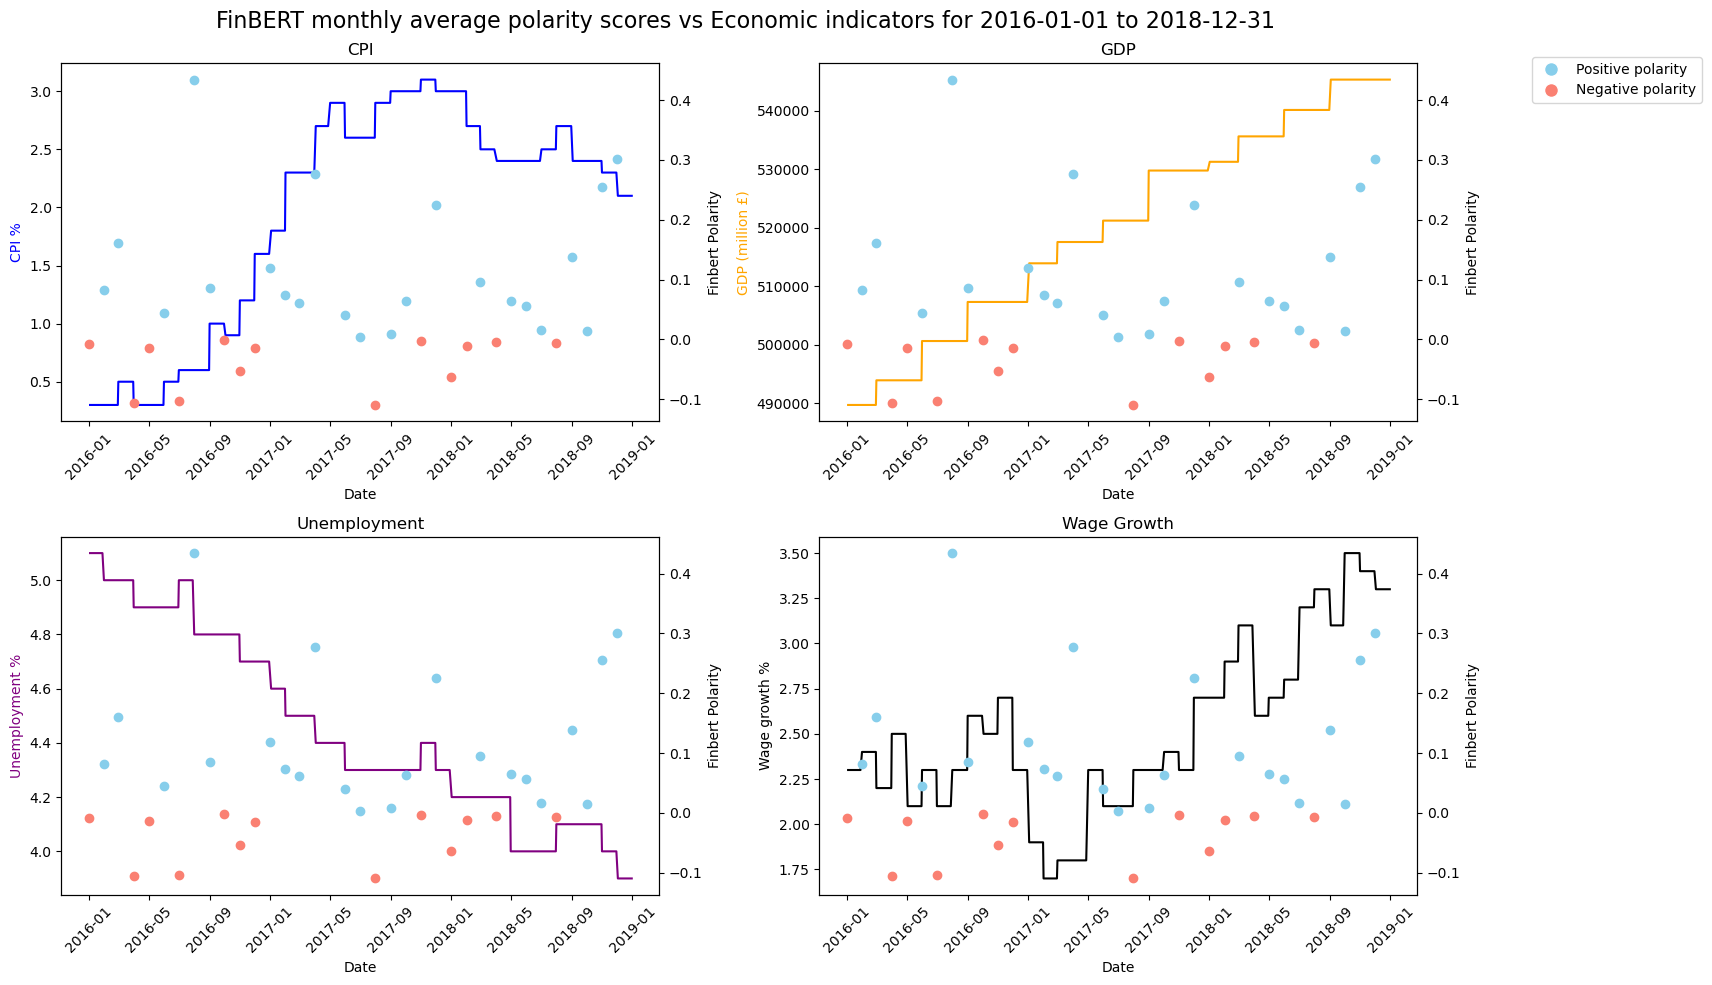

In [29]:
# Set the date range required
start_date = '2016-01-01'
end_date = '2018-12-31'
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

Furthermore, a function was created to provide a more granular look by displaying individual speeches alongside economic indicators, again allowing the selection of data from any date.

In [30]:
# Create a function to plot the individual speeches with the economic indicators
def plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Filter fin_speech_unique dataframe by the selected time frame
    fin_speech_filtered = fin_speech_unique.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['cpi', 'gdp_million', 'unemployment', 'wage_growth']
    colors = ['blue', 'orange', 'purple', 'black']

    # Define y-axis labels
    y_labels = ['CPI %', 'GDP (million £)', 'Unemployment %', 'Wage growth %']

    # Plot each eco indicator against finBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', labelrotation=45)

        # Create secondary y-axis for finBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot all finBERT polarity data points
        for date, row in fin_speech_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot titles
    axs[0, 0].set_title('CPI')
    axs[0, 1].set_title('GDP')
    axs[1, 0].set_title('Unemployment')
    axs[1, 1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT polarity speech scores vs Economic indicators for {start_date} to {end_date}', fontsize=16)

    # Adjust the spacing between the main title and subplots
    plt.subplots_adjust(top=0.9)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

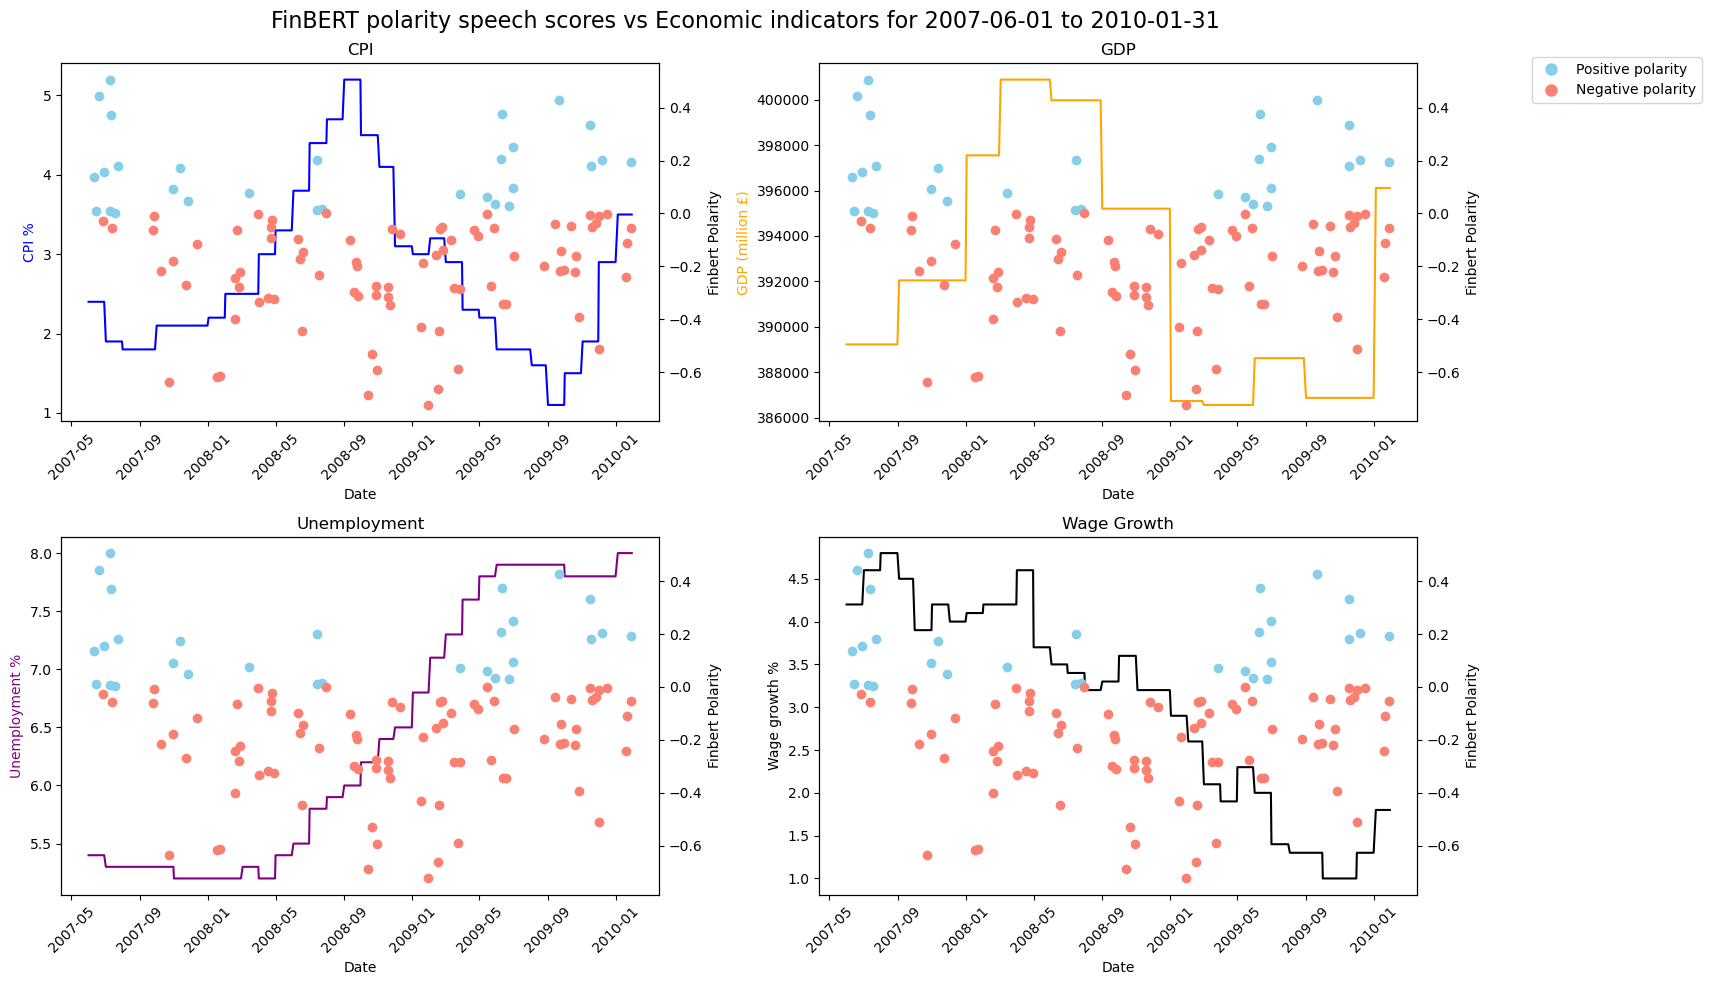

In [31]:
# Set the date range required
start_date = '2007-06-01'
end_date = '2010-01-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

In [32]:
# Save the plot
plt.savefig('line_plot4.png')

<Figure size 640x480 with 0 Axes>

Looking at the GFC again, sentiment is clearly negative. However, with an even spread of positive speeches during that time frame, it's difficult to attribute either end of the sentiment scale to having a corresponding effect on the movement of those indicators.

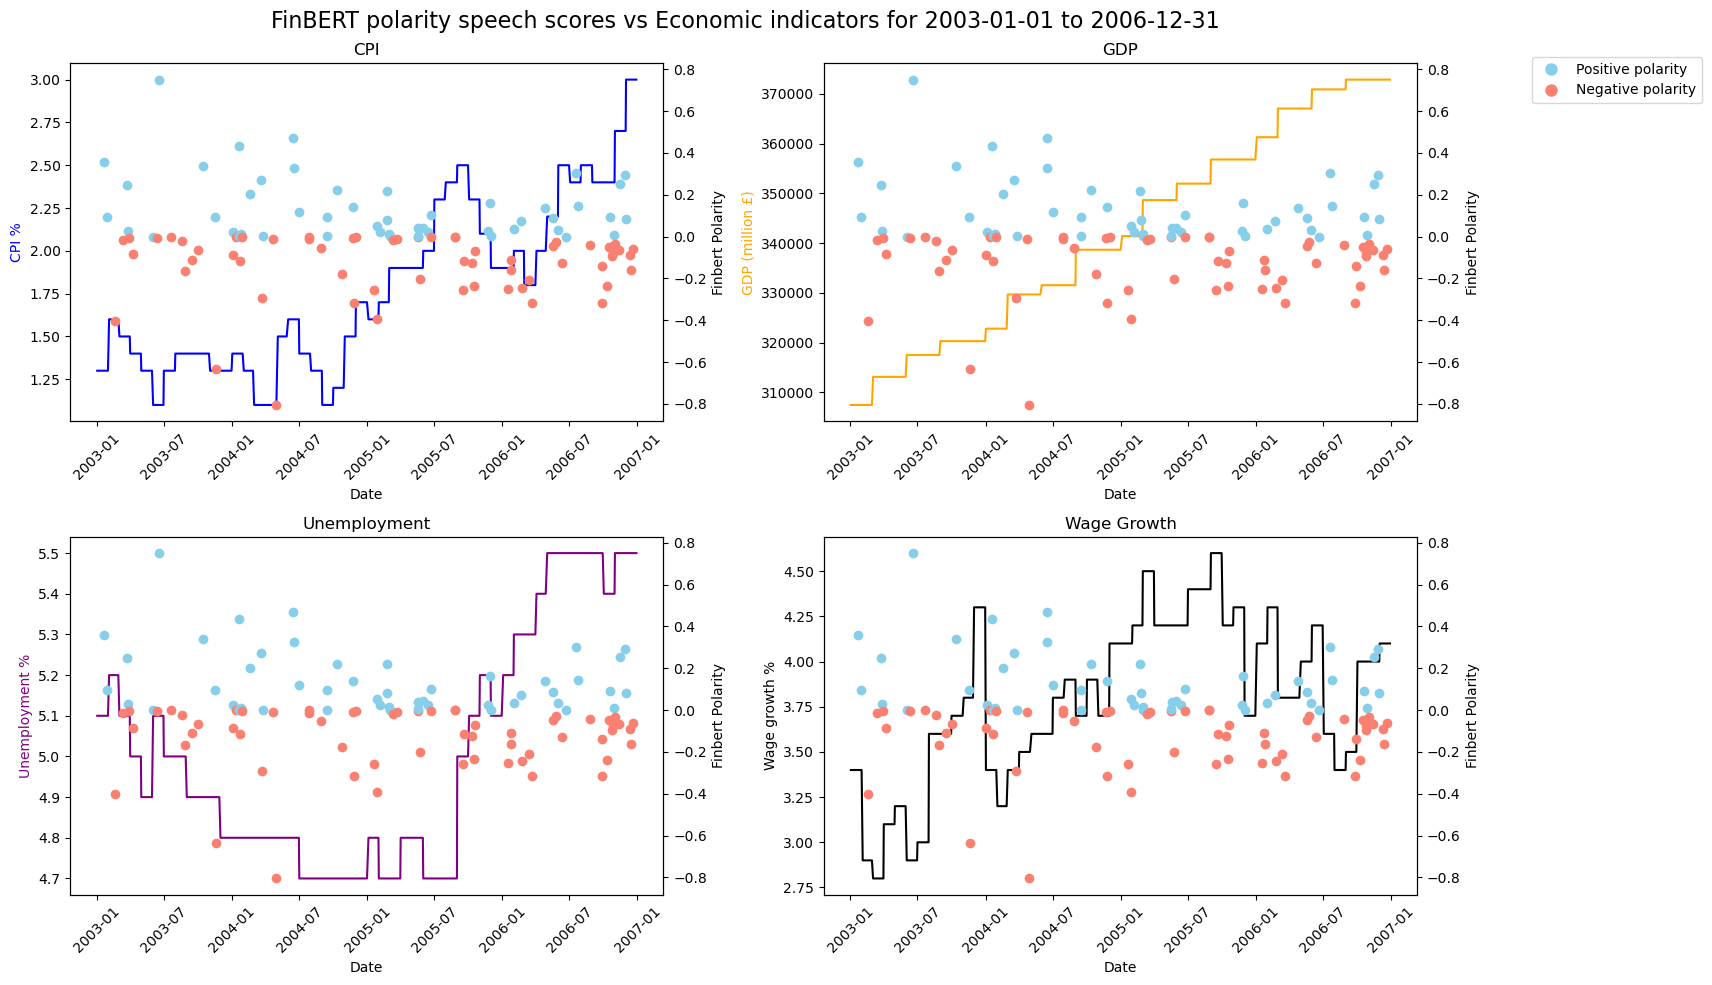

In [33]:
# Set the date range required
start_date = '2003-01-01'
end_date = '2006-12-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

In [34]:
# Save the plot
plt.savefig('line_plot5.png')

<Figure size 640x480 with 0 Axes>

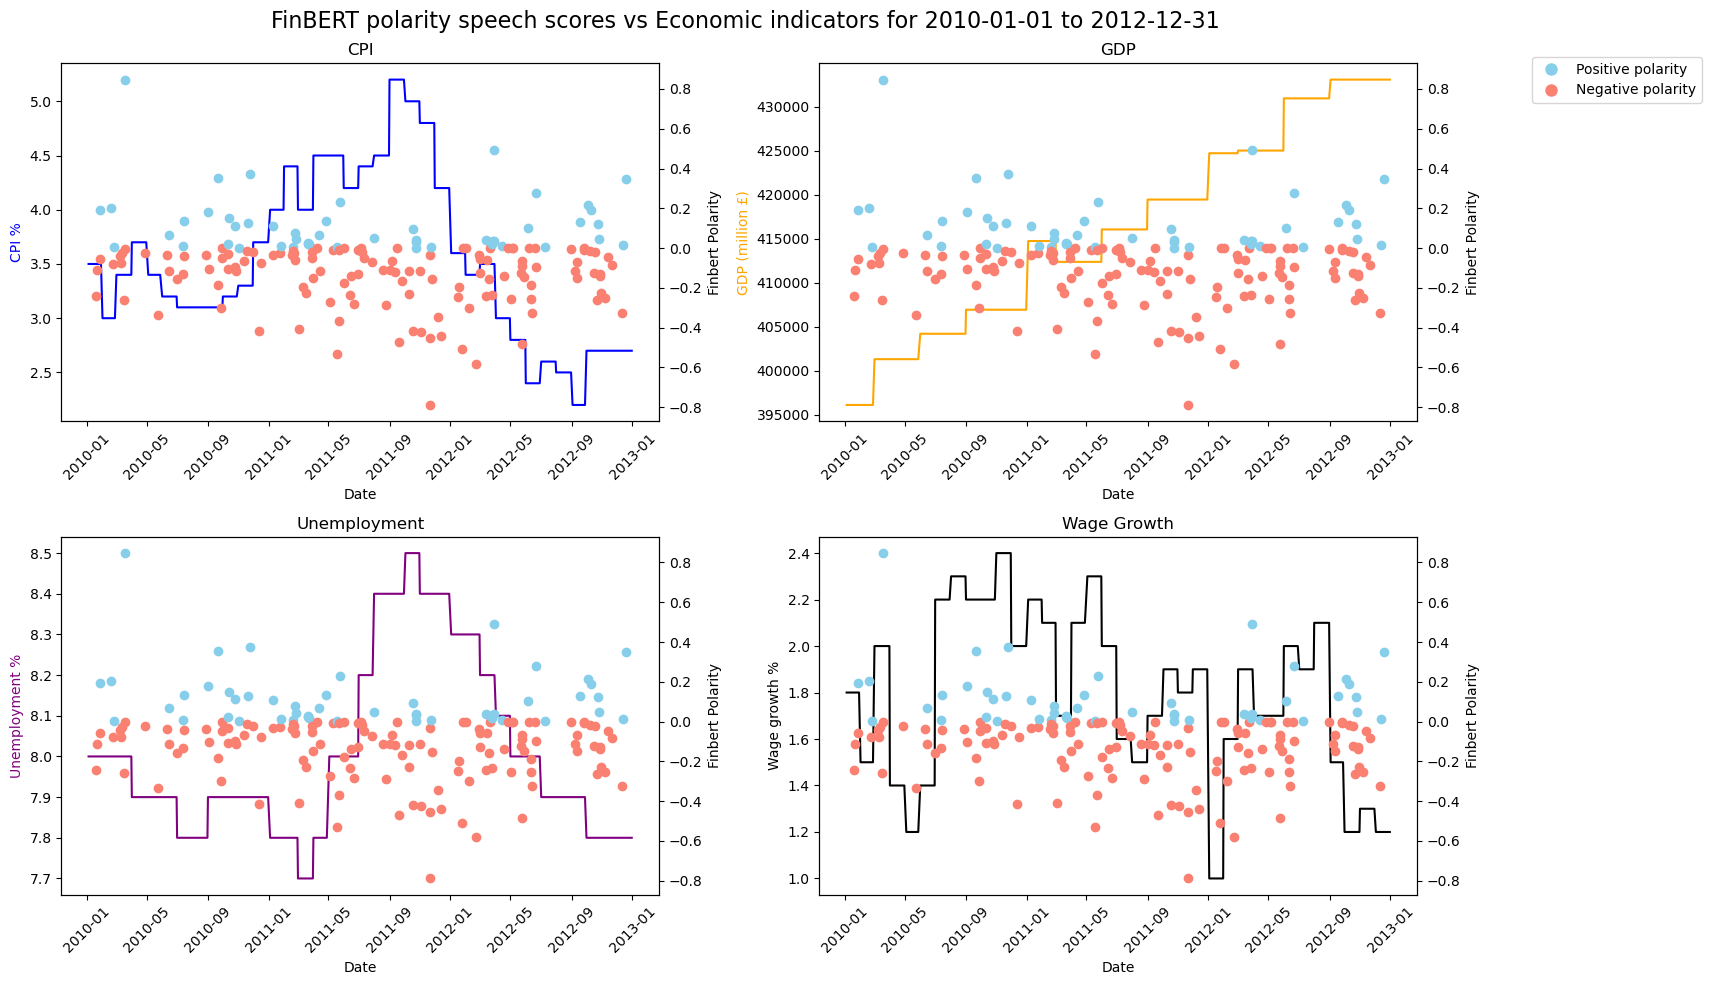

In [35]:
# Set the date range required
start_date = '2010-01-01'
end_date = '2012-12-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

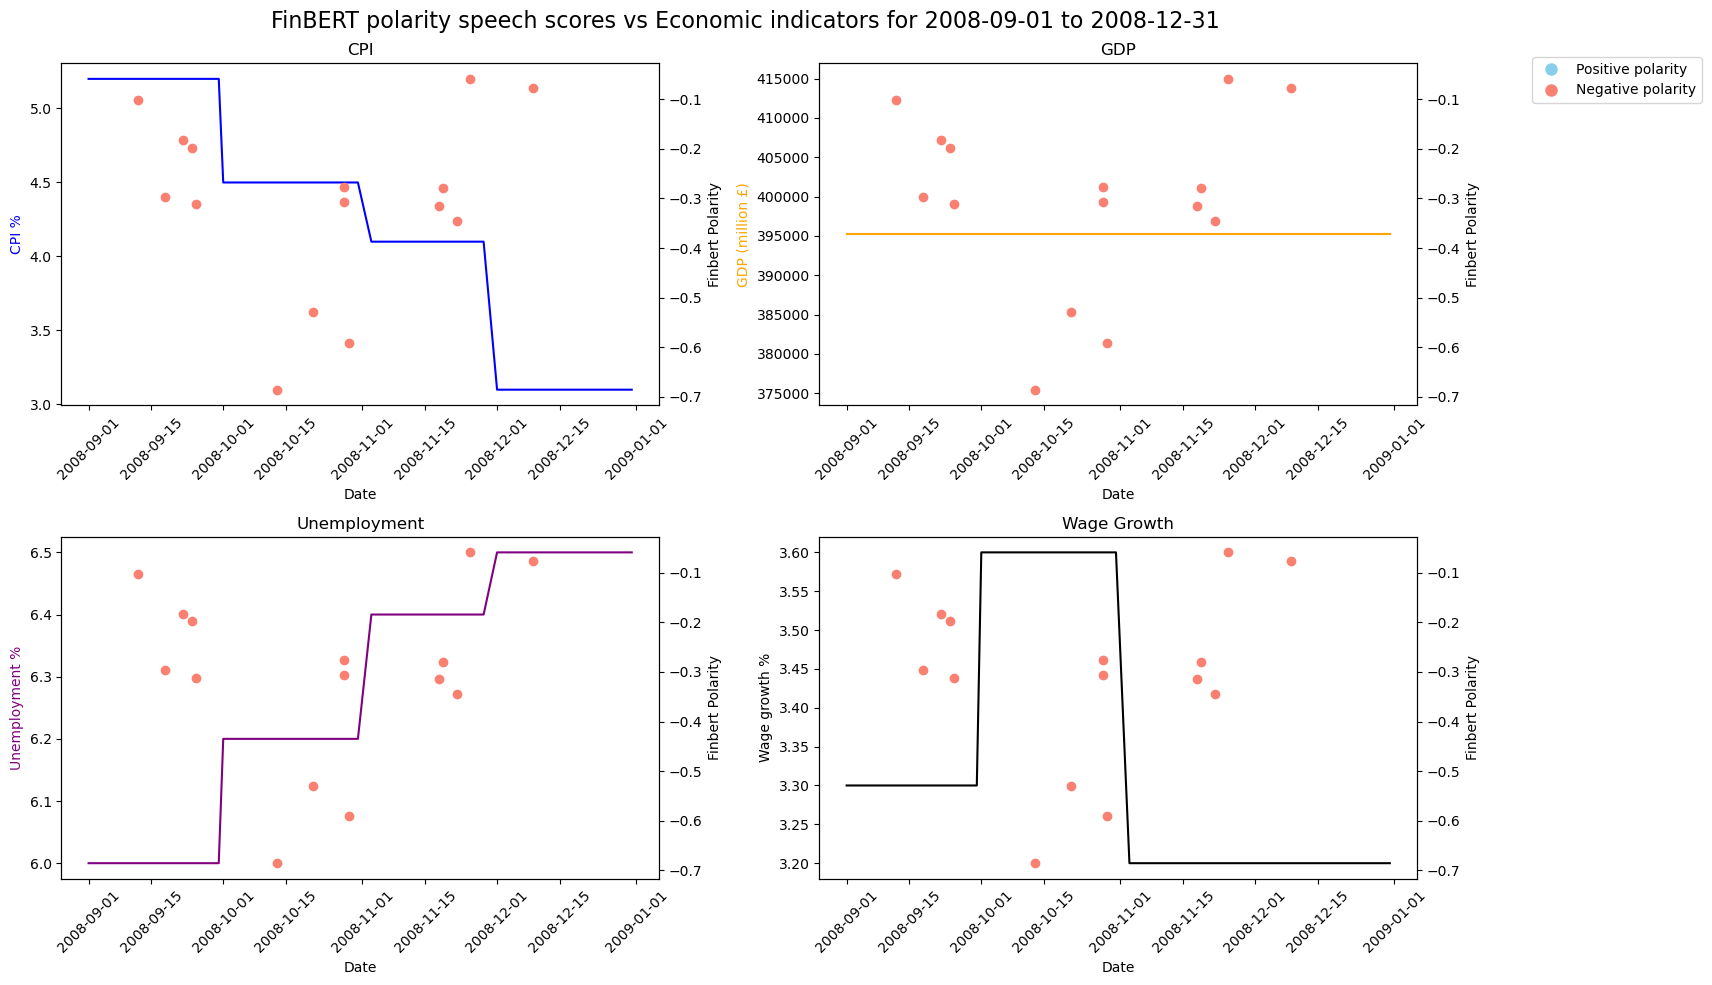

In [36]:
# Set the date range required
start_date = '2008-09-01'
end_date = '2008-12-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

For consistency, the two months were selected for review that were also plotted in the daily market analysis. The first was during the GFC, from September '08 until December '08, a period characterized by negative sentiment, as highlighted by the absence of any positive speeches. Notably, despite the negative sentiment in speeches, the markets have moved in positive directions, with both CPI dropping and wage growth increasing. Additionally, GDP has remained unchanged, despite the prevalence of negative speeches during that time.

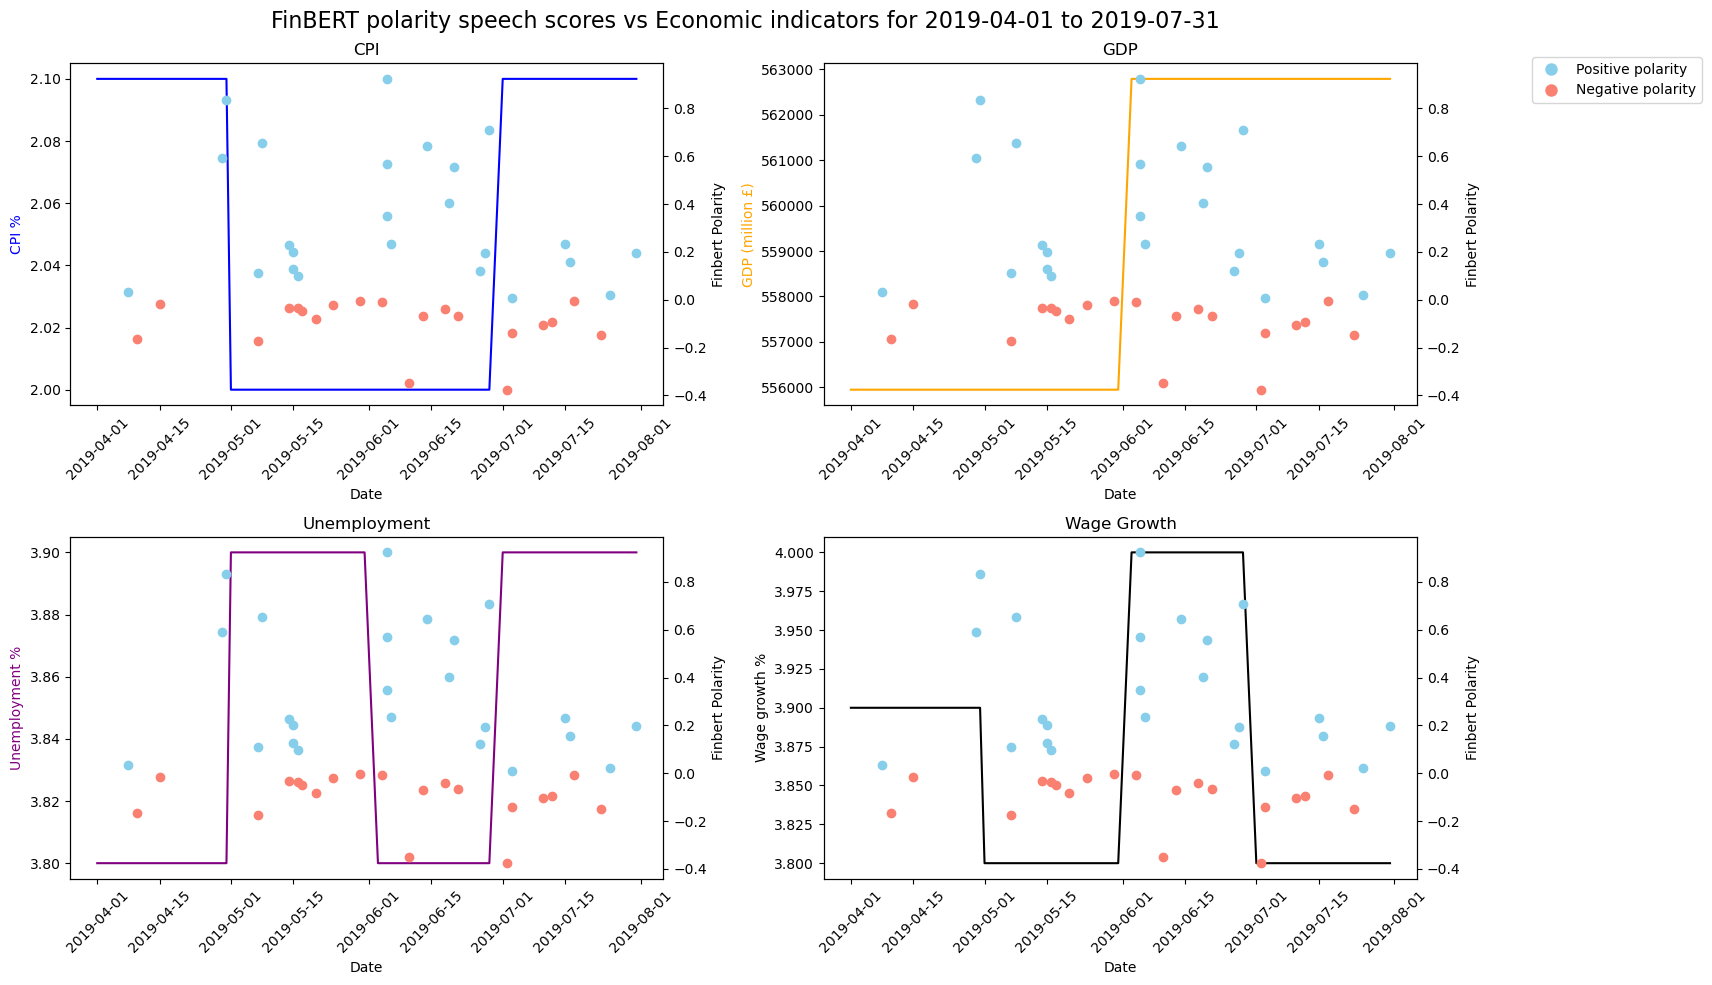

In [37]:
# Set the date range required
start_date = '2019-04-01'
end_date = '2019-07-31'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

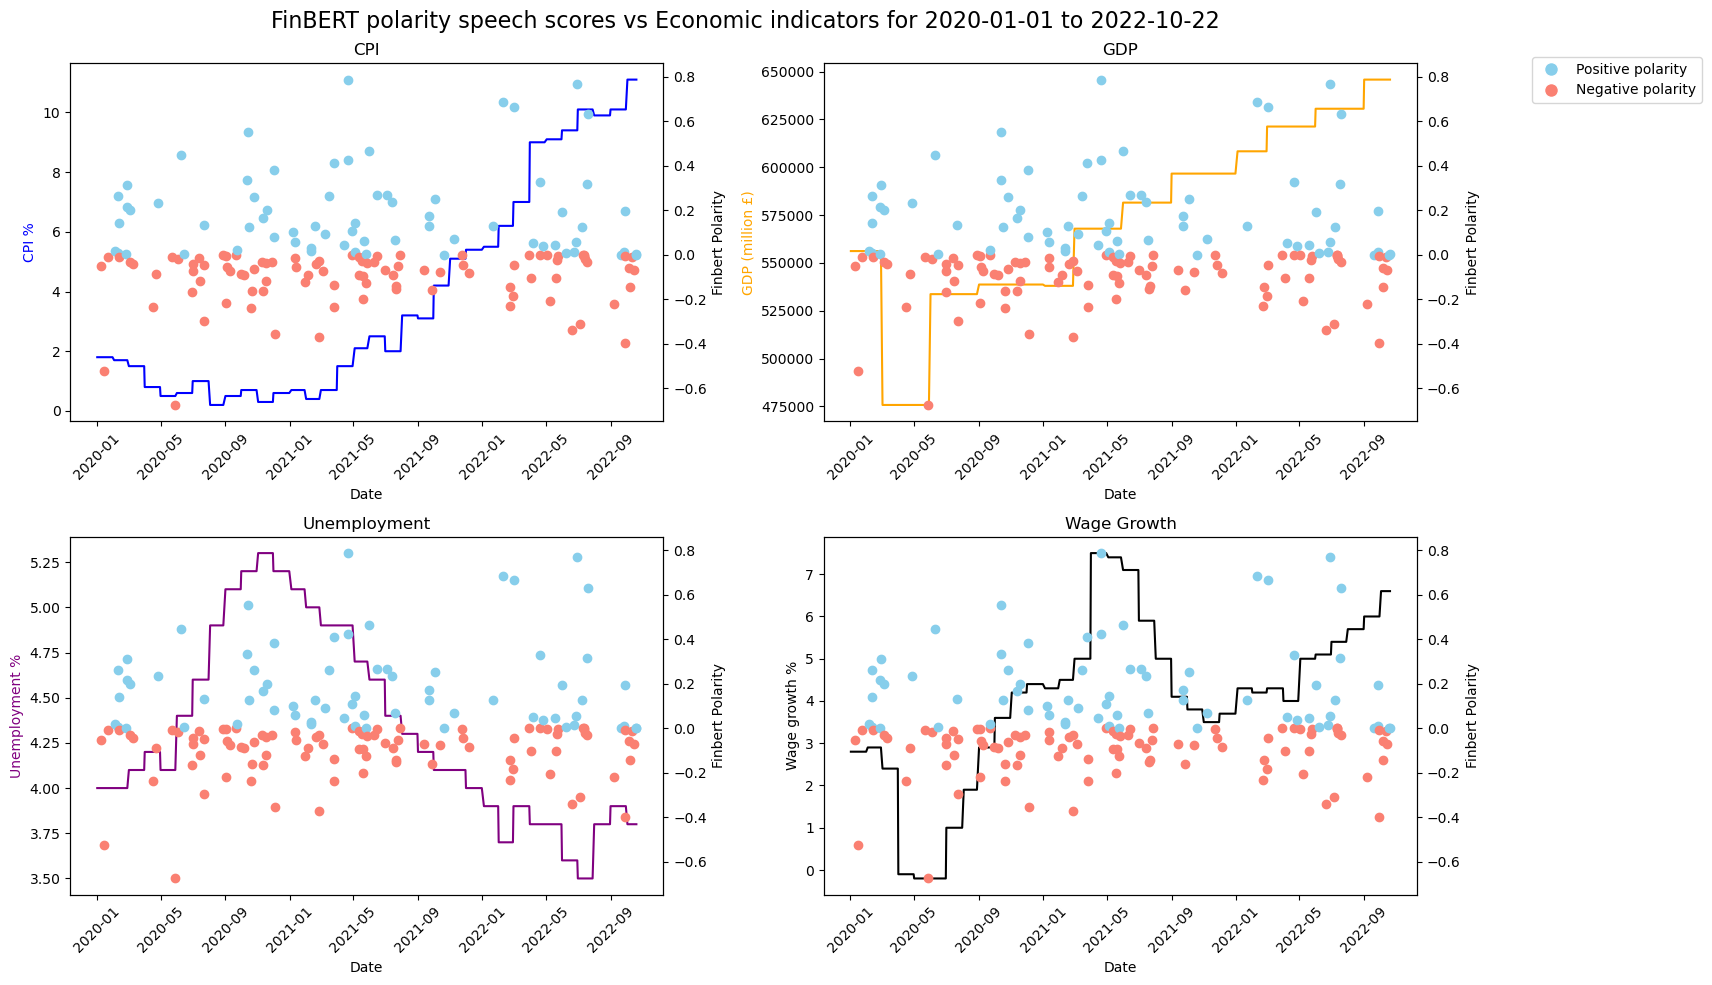

In [38]:
# Set the date range required for Covid
start_date = '2020-01-01'
end_date = '2022-10-22'
plot_all_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date)

The second period that was also reviewed in the daily market analysis was the positive sentiment period from April '19 until July '19. There is a definite improvement in the positivity of the speeches, with just over half having positive FinBERT polarity scores. However, the markets moved in both directions during this time, and it is evident that the speeches had no bearing on these occurrences.

One final note: the number of speeches made during the negative four-month period in 2008 is vastly fewer than the positive period in 2019. The question is whether this is due to a general increase in the number of speeches over the years or if they remain quiet during times of downtu.n.

After concluding a visual exploration of the economic indicators through various plots and assuming that the speeches do not have a clear bearing on the movement of economic indicators, further checks on correlation will be conducted using a heatmap, as well as Pearson and Spearman correlation calculations.

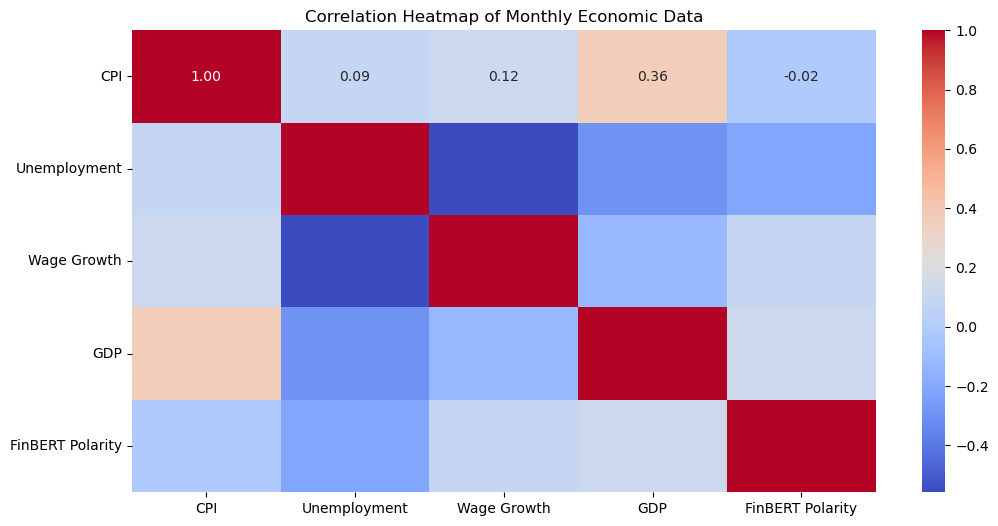

In [39]:
# Calculate correlation matrix
correlation_matrix = eco_monthly.corr()

# Rename axis labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index={'cpi': 'CPI', 
                                                      'unemployment': 'Unemployment', 
                                                      'wage_growth': 'Wage Growth', 
                                                      'gdp_million': 'GDP', 
                                                      'finbert_polarity': 'FinBERT Polarity'}, 
                                               columns={'cpi': 'CPI', 
                                                        'unemployment': 'Unemployment', 
                                                        'wage_growth': 'Wage Growth', 
                                                        'gdp_million': 'GDP', 
                                                        'finbert_polarity': 'FinBERT Polarity'})

# Plot correlation matrix with renamed axis labels
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Monthly Economic Data')
plt.show()

In [40]:
# Save the plot
plt.savefig('line_plot6.jpg')

<Figure size 640x480 with 0 Axes>

In [41]:
# Calculate Pearson correlations
correlation_cpi = eco_monthly['cpi'].corr(eco_monthly['finbert_polarity'])
correlation_gdp = eco_monthly['gdp_million'].corr(eco_monthly['finbert_polarity'])
correlation_unemployment = eco_monthly['unemployment'].corr(eco_monthly['finbert_polarity'])
correlation_wage_growth = eco_monthly['wage_growth'].corr(eco_monthly['finbert_polarity'])

# Print correlations with four decimal places
print("Pearson's correlation between CPI and FinBERT polarity:", round(correlation_cpi, 4))
print("Pearson's correlation between GDP and FinBERT polarity:", round(correlation_gdp, 4))
print("Pearson's correlation between Unemployment and FinBERT polarity:", round(correlation_unemployment, 4))
print("Pearson's correlation between Wage Growth and FinBERT polarity:", round(correlation_wage_growth, 4))

Pearson's correlation between CPI and FinBERT polarity: -0.0155
Pearson's correlation between GDP and FinBERT polarity: 0.1251
Pearson's correlation between Unemployment and FinBERT polarity: -0.2163
Pearson's correlation between Wage Growth and FinBERT polarity: 0.0891


In [42]:
from scipy.stats import spearmanr

# Calculate Spearman's correlations 
correlation_cpi, p_value_cpi = spearmanr(eco_monthly['cpi'], eco_monthly['finbert_polarity'])
correlation_gdp, p_value_gdp = spearmanr(eco_monthly['gdp_million'], eco_monthly['finbert_polarity'])
correlation_unemployment, p_value_unemployment = spearmanr(eco_monthly['unemployment'], eco_monthly['finbert_polarity'])
correlation_wage_growth, p_value_wage_growth = spearmanr(eco_monthly['wage_growth'], eco_monthly['finbert_polarity'])

# Print correlations with four decimal places
print("Spearman's correlation between CPI and FinBERT polarity:", round(correlation_cpi, 4))
print("Spearman's correlation between GDP and FinBERT polarity:", round(correlation_gdp, 4))
print("Spearman's correlation between Unemployment and FinBERT polarity:", round(correlation_unemployment, 4))
print("Spearman's correlation between Wage Growth and FinBERT polarity:", round(correlation_wage_growth, 4))

Spearman's correlation between CPI and FinBERT polarity: -0.1276
Spearman's correlation between GDP and FinBERT polarity: 0.0558
Spearman's correlation between Unemployment and FinBERT polarity: -0.1977
Spearman's correlation between Wage Growth and FinBERT polarity: 0.0943


To reiterate what the plots all showed, the check for correlation also served to reinforce the assumption that the speech sentiment does not correlate with the economic indicators reviewed. 

## Conclusions

From the analysis conducted over various time frames, both positive and negative, and also with a look at the extreme ends of the FinBERT polarity score speeches, it's shown that there is no correlation between the tone of the speech and the economic indicators CPI, GDP, Unemployment, and Wage growth. 
The movement of these indicators and economic sentiment at the time is therefore more likely to be the reason the speeches are of a certain tone rather than the tone of these creating fluctuations. The economic indicators analysed are far more likely to fluctuate due to world events, financial bubbles bursting, or political policy than due to the sentiment of the BoE speech maker.

Just a quick look into the GFC period for some corraltion figures. 

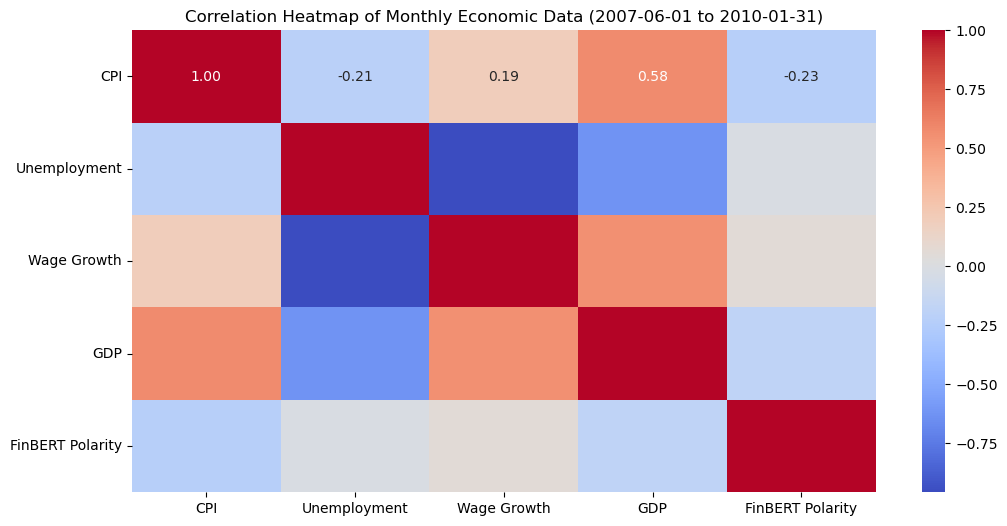

In [43]:
# Filter data for the specified date range
eco_gfc = eco_monthly.loc['2007-06-01':'2010-01-31']

# Calculate correlation matrix for the filtered data
correlation_matrix = eco_gfc.corr()

# Rename axis labels in the correlation matrix
correlation_matrix = correlation_matrix.rename(index={'cpi': 'CPI', 
                                                      'unemployment': 'Unemployment', 
                                                      'wage_growth': 'Wage Growth', 
                                                      'gdp_million': 'GDP', 
                                                      'finbert_polarity': 'FinBERT Polarity'}, 
                                               columns={'cpi': 'CPI', 
                                                        'unemployment': 'Unemployment', 
                                                        'wage_growth': 'Wage Growth', 
                                                        'gdp_million': 'GDP', 
                                                        'finbert_polarity': 'FinBERT Polarity'})

# Plot correlation matrix with renamed axis labels
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Monthly Economic Data (2007-06-01 to 2010-01-31)')
plt.show()

In [44]:
# Calculate Pearson correlations for the filtered data
correlation_cpi = eco_gfc['cpi'].corr(eco_gfc['finbert_polarity'])
correlation_gdp = eco_gfc['gdp_million'].corr(eco_gfc['finbert_polarity'])
correlation_unemployment = eco_gfc['unemployment'].corr(eco_gfc['finbert_polarity'])
correlation_wage_growth = eco_gfc['wage_growth'].corr(eco_gfc['finbert_polarity'])

# Print correlations with four decimal places
print("Pearson's correlation between CPI and FinBERT polarity:", round(correlation_cpi, 4))
print("Pearson's correlation between GDP and FinBERT polarity:", round(correlation_gdp, 4))
print("Pearson's correlation between Unemployment and FinBERT polarity:", round(correlation_unemployment, 4))
print("Pearson's correlation between Wage Growth and FinBERT polarity:", round(correlation_wage_growth, 4))

Pearson's correlation between CPI and FinBERT polarity: -0.225
Pearson's correlation between GDP and FinBERT polarity: -0.183
Pearson's correlation between Unemployment and FinBERT polarity: -0.0124
Pearson's correlation between Wage Growth and FinBERT polarity: 0.0555


In [45]:
# Calculate Spearman's correlations 
correlation_cpi, p_value_cpi = spearmanr(eco_gfc['cpi'], eco_gfc['finbert_polarity'])
correlation_gdp, p_value_gdp = spearmanr(eco_gfc['gdp_million'], eco_gfc['finbert_polarity'])
correlation_unemployment, p_value_unemployment = spearmanr(eco_gfc['unemployment'], eco_gfc['finbert_polarity'])
correlation_wage_growth, p_value_wage_growth = spearmanr(eco_gfc['wage_growth'], eco_gfc['finbert_polarity'])

# Print correlations with four decimal places
print("Spearman's correlation between CPI and FinBERT polarity:", round(correlation_cpi, 4))
print("Spearman's correlation between GDP and FinBERT polarity:", round(correlation_gdp, 4))
print("Spearman's correlation between Unemployment and FinBERT polarity:", round(correlation_unemployment, 4))
print("Spearman's correlation between Wage Growth and FinBERT polarity:", round(correlation_wage_growth, 4))

Spearman's correlation between CPI and FinBERT polarity: -0.2072
Spearman's correlation between GDP and FinBERT polarity: -0.1361
Spearman's correlation between Unemployment and FinBERT polarity: -0.0182
Spearman's correlation between Wage Growth and FinBERT polarity: 0.1218


# Additional analysis

In [46]:
# Import file
base_rate = pd.read_excel('Base rate.xlsx')

# View the dataframe
base_rate.head()

date  rate %
0 1999-01-07    6.00
1 1999-02-04    5.50
2 1999-04-08    5.25
3 1999-06-10    5.00
4 1999-09-08    5.25

After importing the base rate data into the notebook a function was created to plot the base rate changes with the economic indicators for some exploratory visualiations.

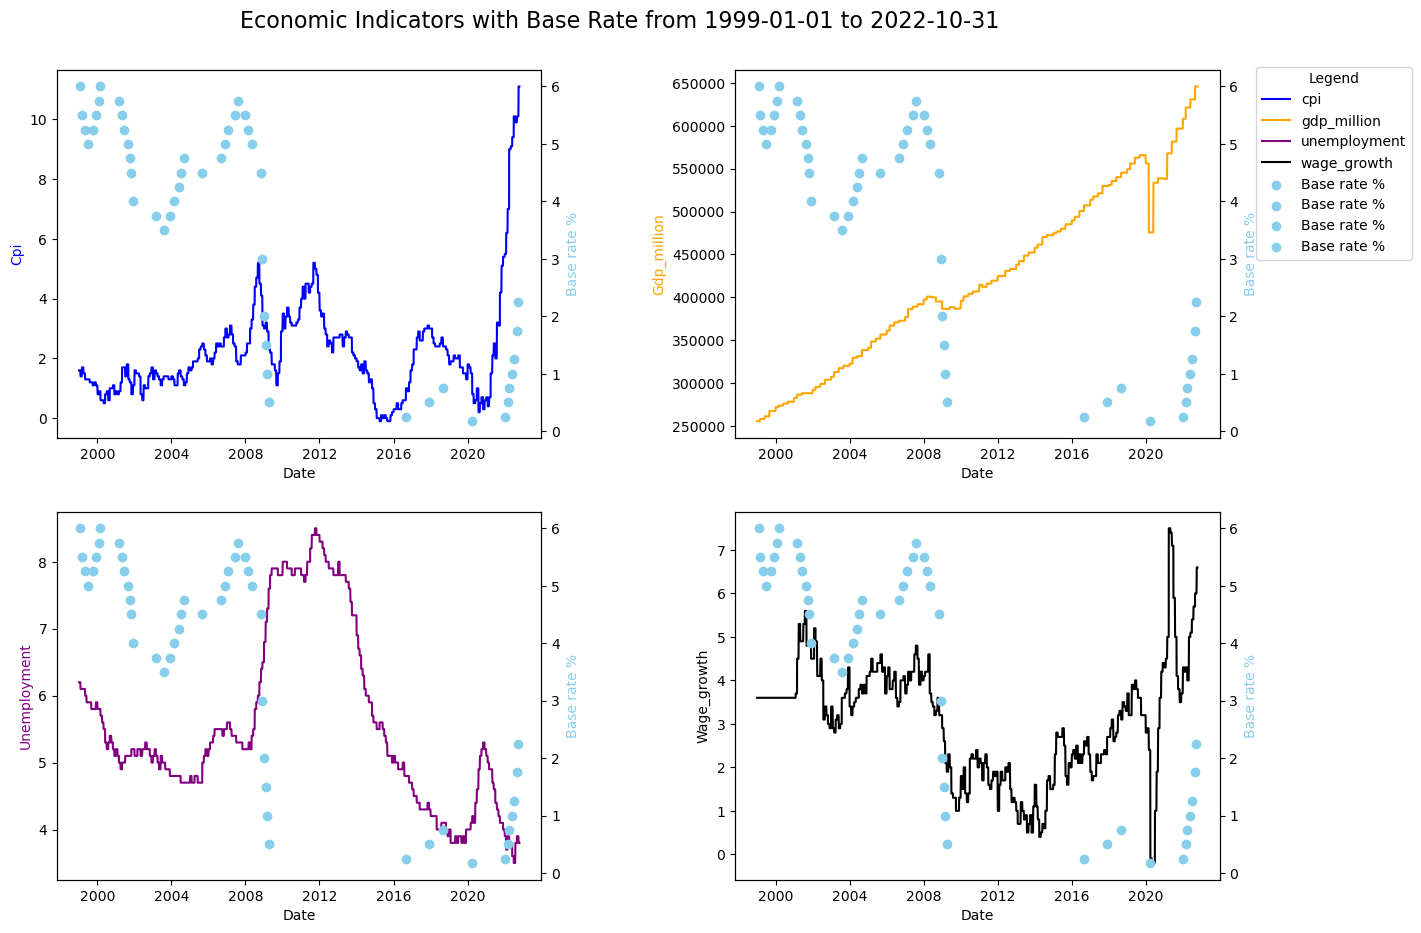

In [47]:
# Create a function to plot the base rate with the economic indicators for any time frame 
def plot_eco_indicators_with_base_rate(base_rate, eco_monthly, start_date, end_date):
    # Convert dates to datetime if not already and set as index if not already set
    if 'date' in eco_monthly.columns:
        eco_monthly['date'] = pd.to_datetime(eco_monthly['date'])
        eco_monthly = eco_monthly.set_index('date')
    if 'date' in base_rate.columns:
        base_rate['date'] = pd.to_datetime(base_rate['date'])
        base_rate = base_rate.set_index('date')

    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date].reset_index()

    # Resample base_rate dataframe to match the frequency of eco_monthly
    base_rate_resampled = base_rate.resample('M').mean().loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['cpi', 'gdp_million', 'unemployment', 'wage_growth']
    colors = ['blue', 'orange', 'purple', 'black']

    # Plot each eco indicator with base rate
    for i, (col, color) in enumerate(zip(columns_to_plot, colors)):
        ax = axs[i // 2, i % 2]
        ax.plot(eco_monthly_filtered['date'], eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(col.capitalize(), color=color)

        # Scatter plot base rate data points on secondary y-axis
        ax2 = ax.twinx()
        ax2.scatter(base_rate_resampled.index, base_rate_resampled['rate %'], color='skyblue', label='Base rate %')
        ax2.set_ylabel('Base rate %', color='skyblue')

    # Add plot titles and adjust layout
    plt.suptitle(f'Economic Indicators with Base Rate from {start_date} to {end_date}', fontsize=16)
    plt.subplots_adjust(top=0.92, wspace=0.4)
    fig.legend(loc='upper left', bbox_to_anchor=(0.92, 0.93), title='Legend')
    plt.show()

# Set the date range required
start_date = '1999-01-01'
end_date = '2022-10-31'
plot_eco_indicators_with_base_rate(base_rate, eco_monthly, start_date, end_date)

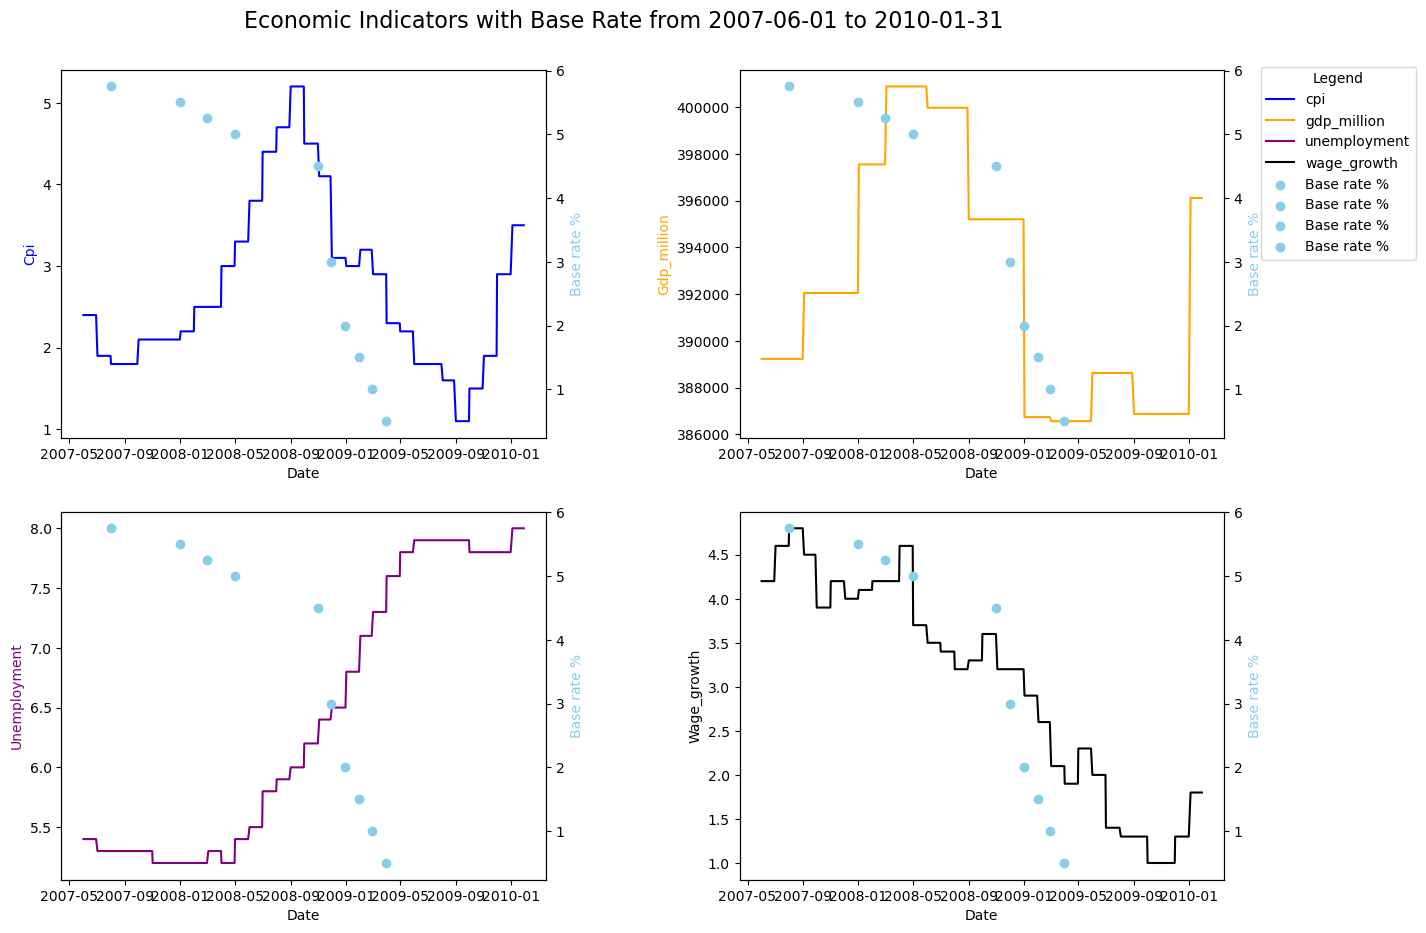

In [48]:
# Example usage 
start_date = '2007-06-01'
end_date = '2010-01-31'
plot_eco_indicators_with_base_rate(base_rate, eco_monthly, start_date, end_date)

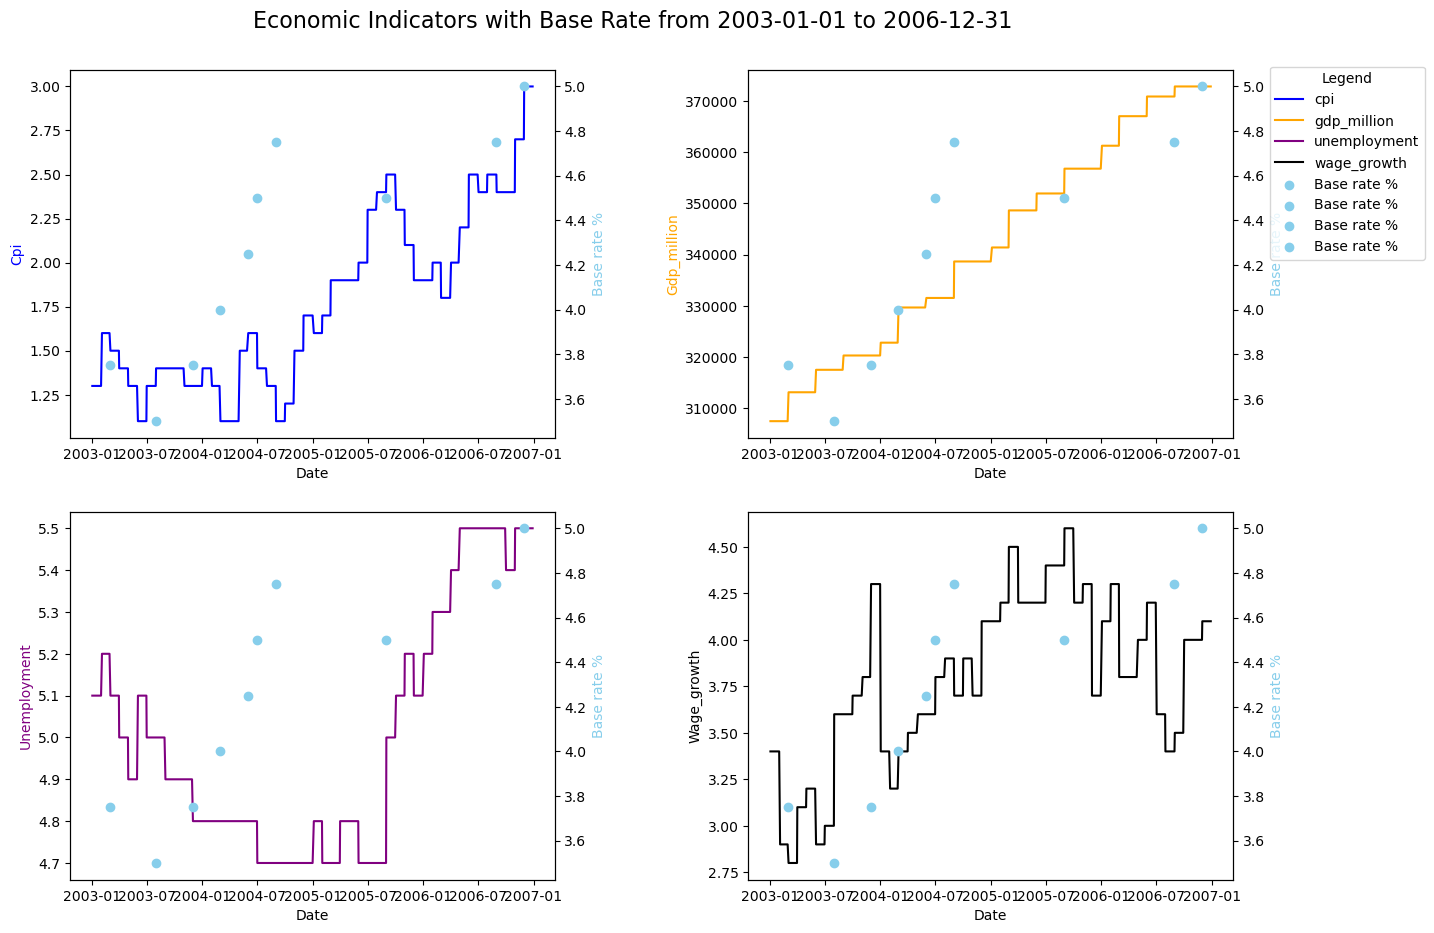

In [49]:
# Set the date range required
start_date = '2003-01-01'
end_date = '2006-12-31'
plot_eco_indicators_with_base_rate(base_rate, eco_monthly, start_date, end_date)

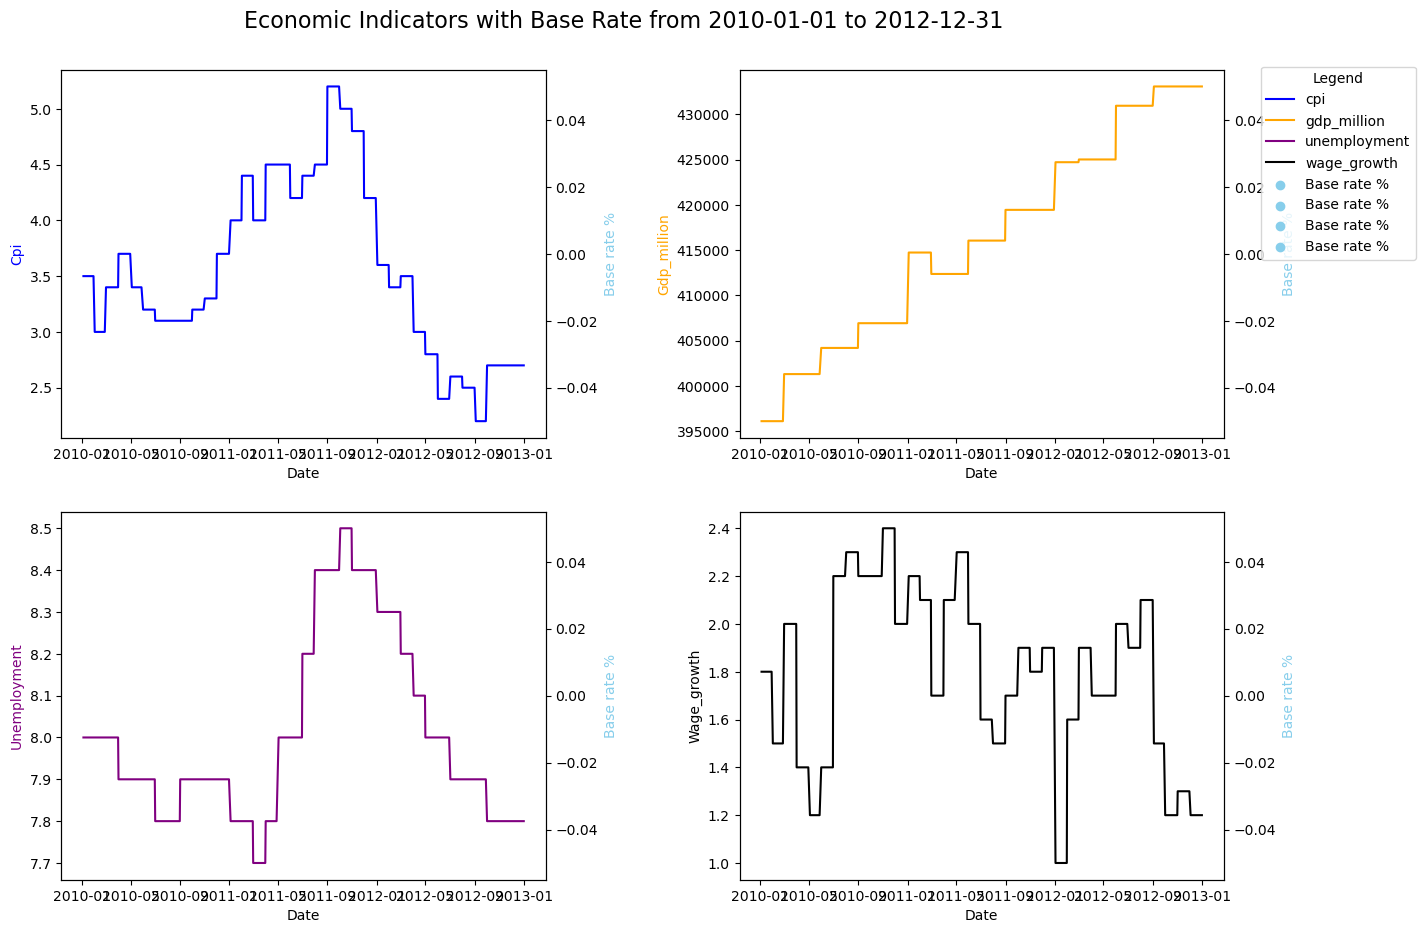

In [50]:
# Set the date range required
start_date = '2010-01-01'
end_date = '2012-12-31'
plot_eco_indicators_with_base_rate(base_rate, eco_monthly, start_date, end_date)

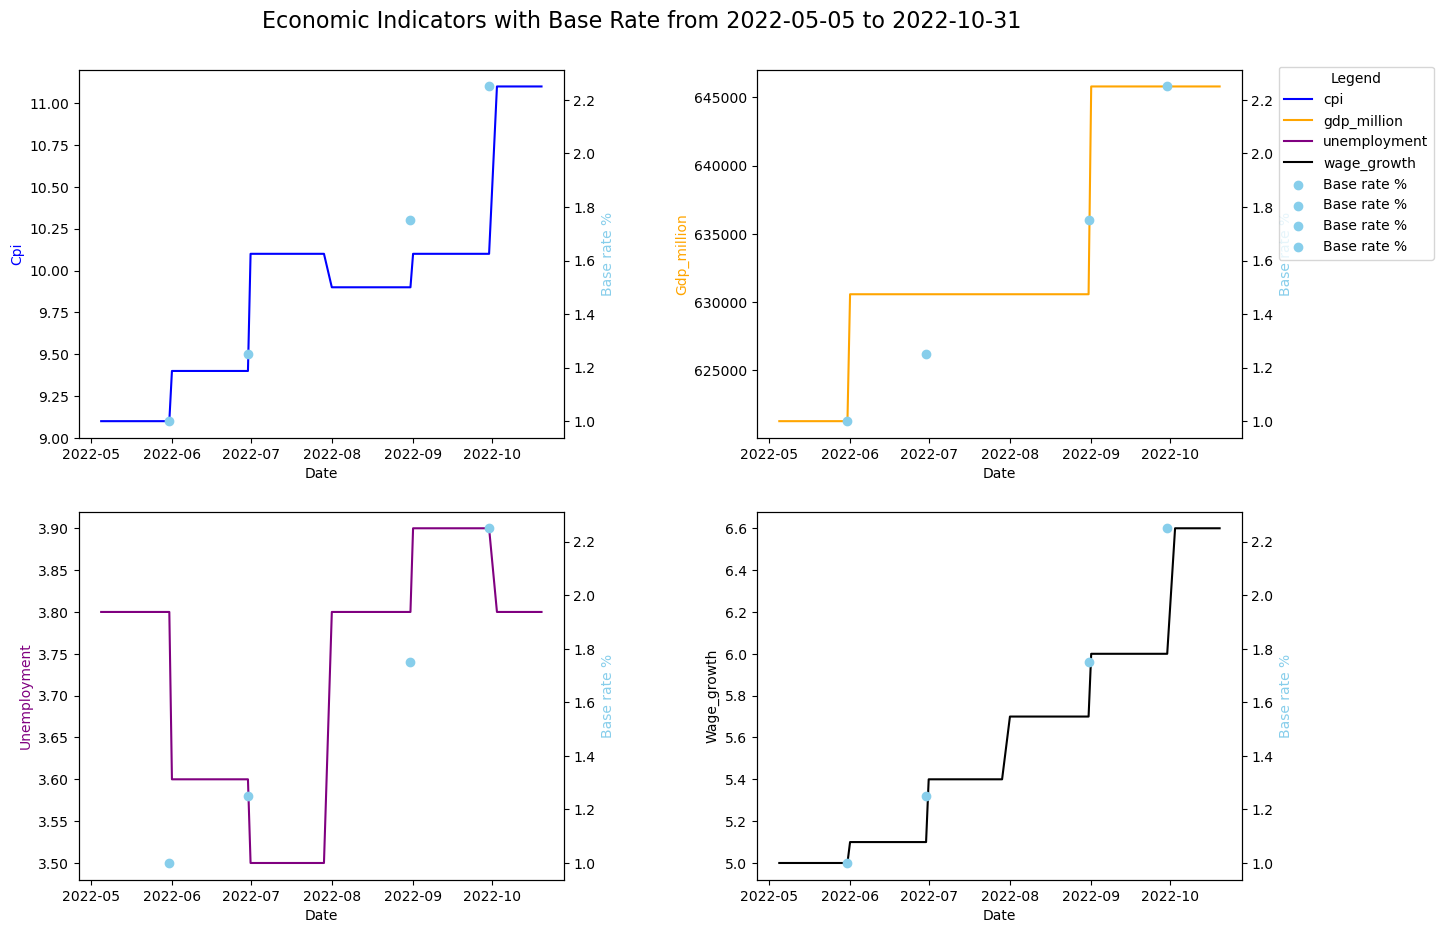

In [51]:
# Set the date range required
start_date = '2022-05-05'
end_date = '2022-10-31'
plot_eco_indicators_with_base_rate(base_rate, eco_monthly, start_date, end_date)

A few different time frames were looked into to see if anything seemed to correlate with The GFC, Golden Age, and a few more then this brief interlude into the data was then halted due to its content being analysed by a colleague. The initial forays did not throw out anything substantial or useful as additional content to the work that had already been done.

The major issue with all these indicators is the granularity of the data being only monthly and the sporadic nature of base rate changes. Couple that with the multitude of factors that could influence the economics then it's hard to define any causation.

It was decided that 2 of the economic indicator plots in the original presentaion would be removed, namely CPI and GDP as they did not show anything worthwhile. Below is the adjusted code for that.

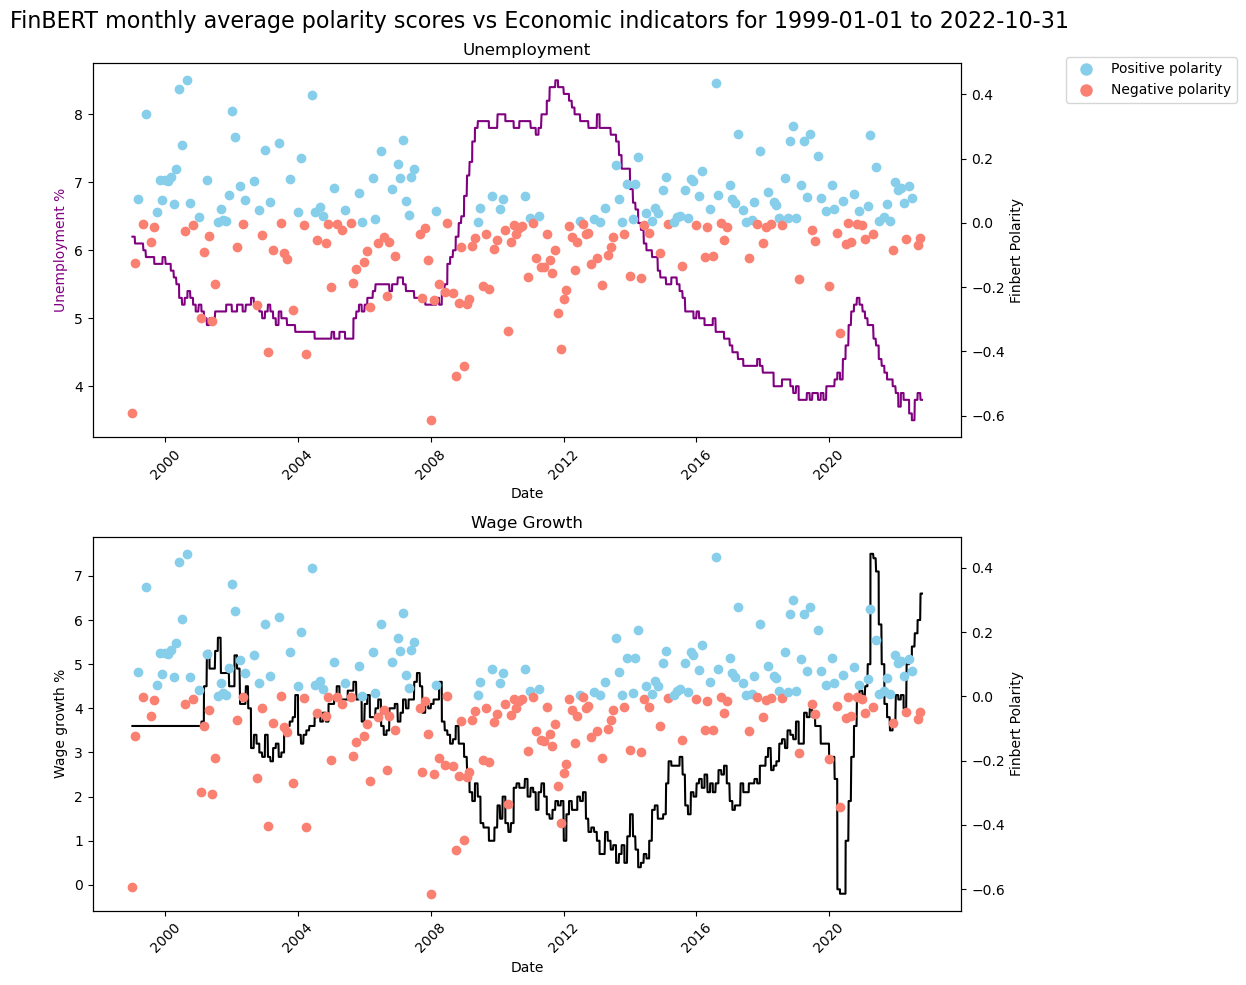

In [52]:
# New version of above code
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figure and axes
    fig, axs = plt.subplots(2, 1, figsize=(10, 10))

    # List of columns to plot
    columns_to_plot = ['unemployment', 'wage_growth']
    colors = ['purple', 'black']

    # Define y-axis labels
    y_labels = ['Unemployment %', 'Wage growth %']

    # Plot each eco indicator against FinBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Create secondary y-axis for FinBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot the monthly average FinBERT polarity
        for date, row in monthly_finbert_polarity_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot titles
    axs[0].set_title('Unemployment')
    axs[1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT monthly average polarity scores vs Economic indicators for {start_date} to {end_date}', fontsize=16)

    # Adjust the spacing between the main title and subplots
    plt.subplots_adjust(top=0.9)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()
    
# Example usage:
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, '1999-01-01', '2022-10-31')

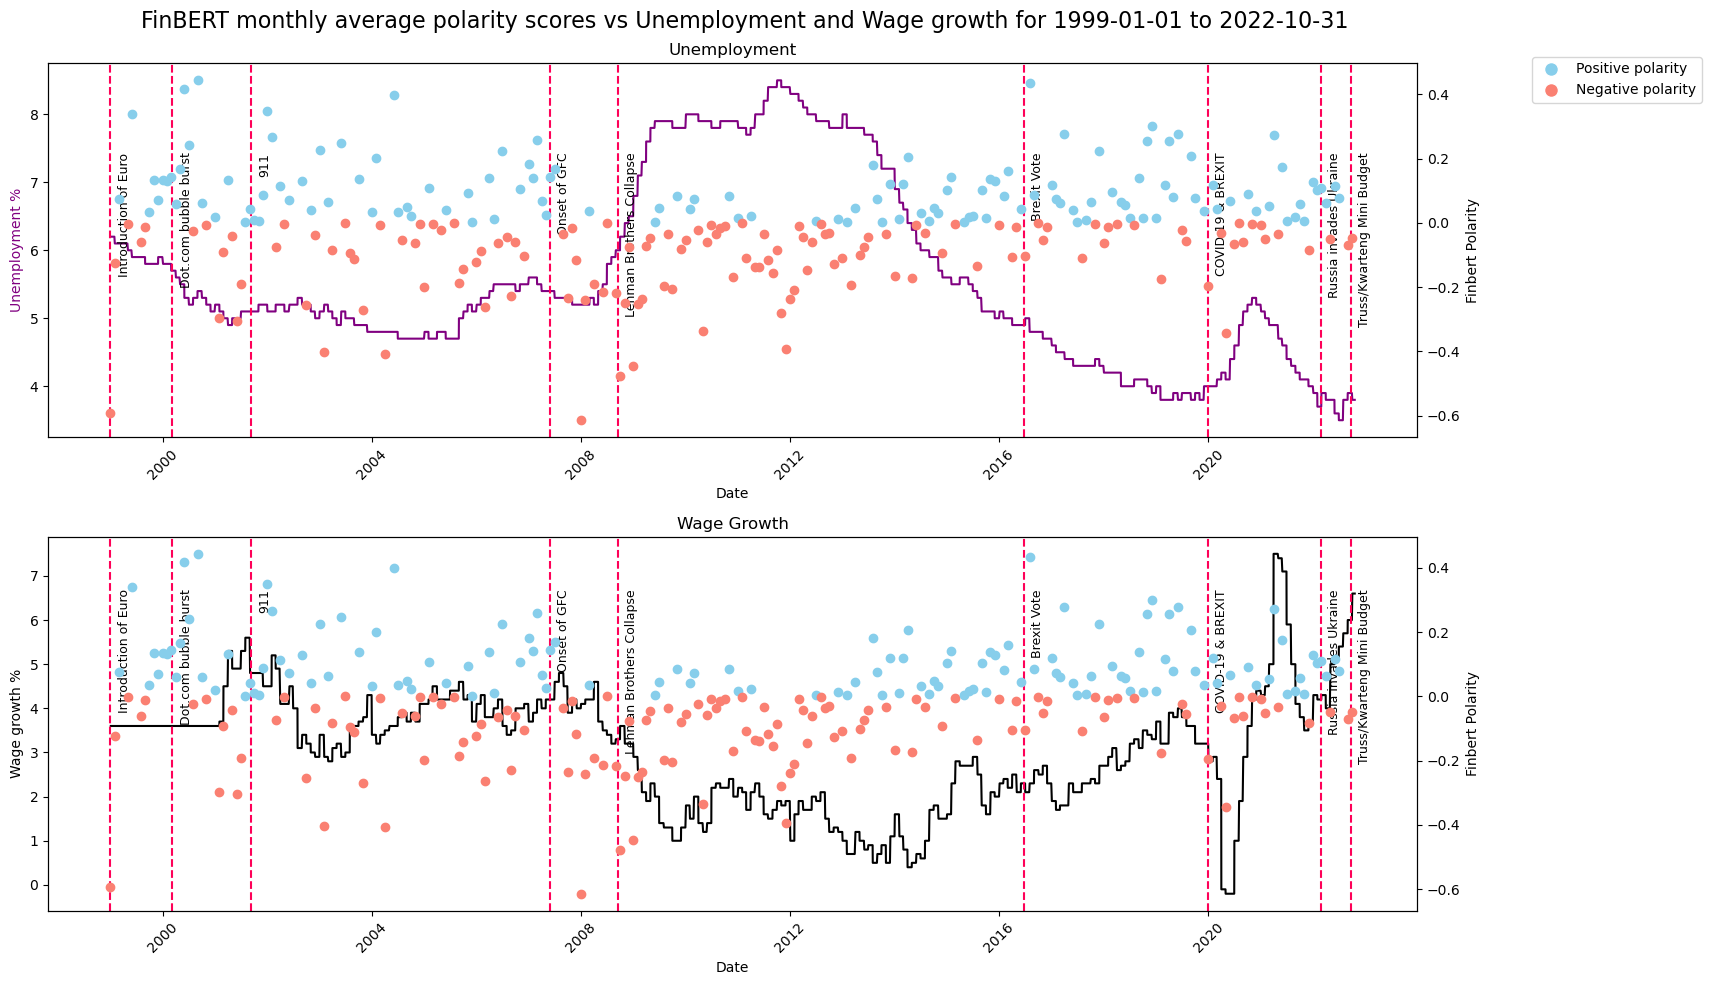

In [53]:
# Add key dates with labels
key_dates = {
    "Introduction of Euro": "1999-01-01",
    "Dot.com bubble burst": "2000-03-10",
    "911": "2001-09-11",
    "Onset of GFC": "2007-06-01",
    "Lehman Brothers Collapse": "2008-09-15",
    "Brexit Vote": "2016-06-23",
    "COVID-19 & BREXIT": "2020-01-01",
    "Russia invades Ukraine": "2022-02-24",
    "Truss/Kwarteng Mini Budget": "2022-09-23"}

# Create a function to compare the monthly average FinBERT scores with the economic indicators
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['unemployment', 'wage_growth']
    colors = ['purple', 'black']

    # Define y-axis labels
    y_labels = ['Unemployment %', 'Wage growth %']

    # Plot each eco indicator against FinBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Create secondary y-axis for FinBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot the monthly average FinBERT polarity
        for date, row in monthly_finbert_polarity_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

        # Add key dates with labels
        for label, date in key_dates.items():
            date = pd.to_datetime(date)
            ax.axvline(date, color='#FE0158', linestyle='--')
            ax.text(x=date + pd.DateOffset(days=50),
                    y=ax.get_ylim()[1] * 0.85,
                    s=label, rotation=90,
                    verticalalignment='top', fontsize=9)

    # Add individual plot titles
    axs[0].set_title('Unemployment')
    axs[1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT monthly average polarity scores vs Unemployment and Wage growth for {start_date} to {end_date}', fontsize=16)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Example usage:
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, '1999-01-01', '2022-10-31')


Key dates were added but this was deemed to make the plot to busy. 

A version was also created with the periods in it in case that was required for the presentation

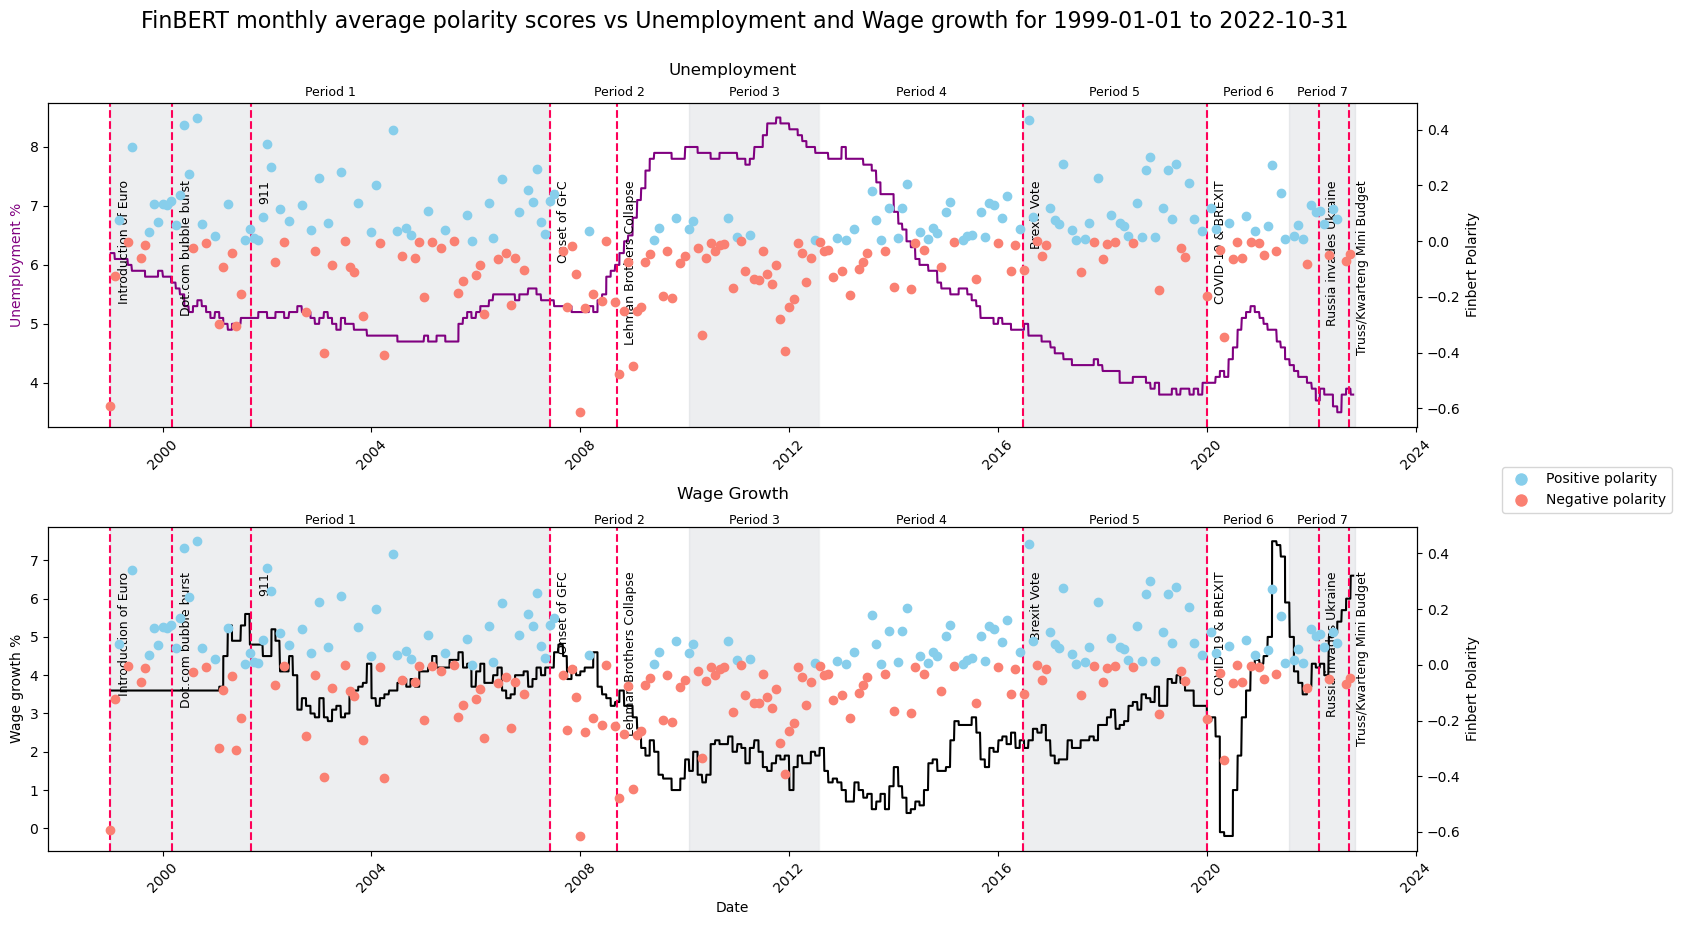

In [54]:
# Define the periods
periods = [
    ("Period 1", "1999", "2007-06-01"),
    ("Period 2", "2007-06-01", "2010-01-31"),
    ("Period 3", "2010-01-31", "2012-07-31"),
    ("Period 4", "2012-07-31", "2016-06-23"),
    ("Period 5", "2016-06-23", "2019-12-31"),
    ("Period 6", "2020-01-01", "2021-07-30"),
    ("Period 7", "2021-07-30", "2022-10-31")]

# Create a function to compare the monthly average FinBERT scores with the economic indicators
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 1, figsize=(15, 10))

    # List of columns to plot
    columns_to_plot = ['unemployment', 'wage_growth']
    colors = ['purple', 'black']

    # Define y-axis labels
    y_labels = ['Unemployment %', 'Wage growth %']

    # Plot each eco indicator against FinBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Create secondary y-axis for FinBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot the monthly average FinBERT polarity
        for date, row in monthly_finbert_polarity_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

        # Add key dates with labels
        for label, date in key_dates.items():
            date = pd.to_datetime(date)
            ax.axvline(date, color='#FE0158', linestyle='--')
            ax.text(x=date + pd.DateOffset(days=50),
                    y=ax.get_ylim()[1] * 0.85,
                    s=label, rotation=90,
                    verticalalignment='top', fontsize=9)

        # Shade and label the periods
        for period_idx, (period, period_start, period_end) in enumerate(periods):
            period_start = pd.to_datetime(period_start)
            period_end = pd.to_datetime(period_end)
            color = '#C4C9CE' if period_idx % 2 == 0 else 'white'
            ax.axvspan(period_start, period_end, color=color, alpha=0.3)
            midpoint = period_start + (period_end - period_start) / 2
            y_coord = ax.get_ylim()[1] * 1.02  # Move to the top of the plot
            ax.text(midpoint, y_coord, period,
                    horizontalalignment='center',
                    verticalalignment='center', fontsize=9)

    # Add individual plot titles
    axs[0].set_title('Unemployment', pad=20)
    axs[1].set_title('Wage Growth', pad=20)

    # Remove x-axis label from the top plot
    axs[0].set_xlabel('')

    # Add x-axis label only on the bottom plot
    axs[-1].set_xlabel('Date')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT monthly average polarity scores vs Unemployment and Wage growth for {start_date} to {end_date}', fontsize=16, y=0.95)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.0, 0.5))

    # Adjust layout
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the position of the suptitle

    # Show plot
    plt.show()

# Example usage:
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, '1999-01-01', '2022-10-31')


A more condensed width was required for our slide so this was the result

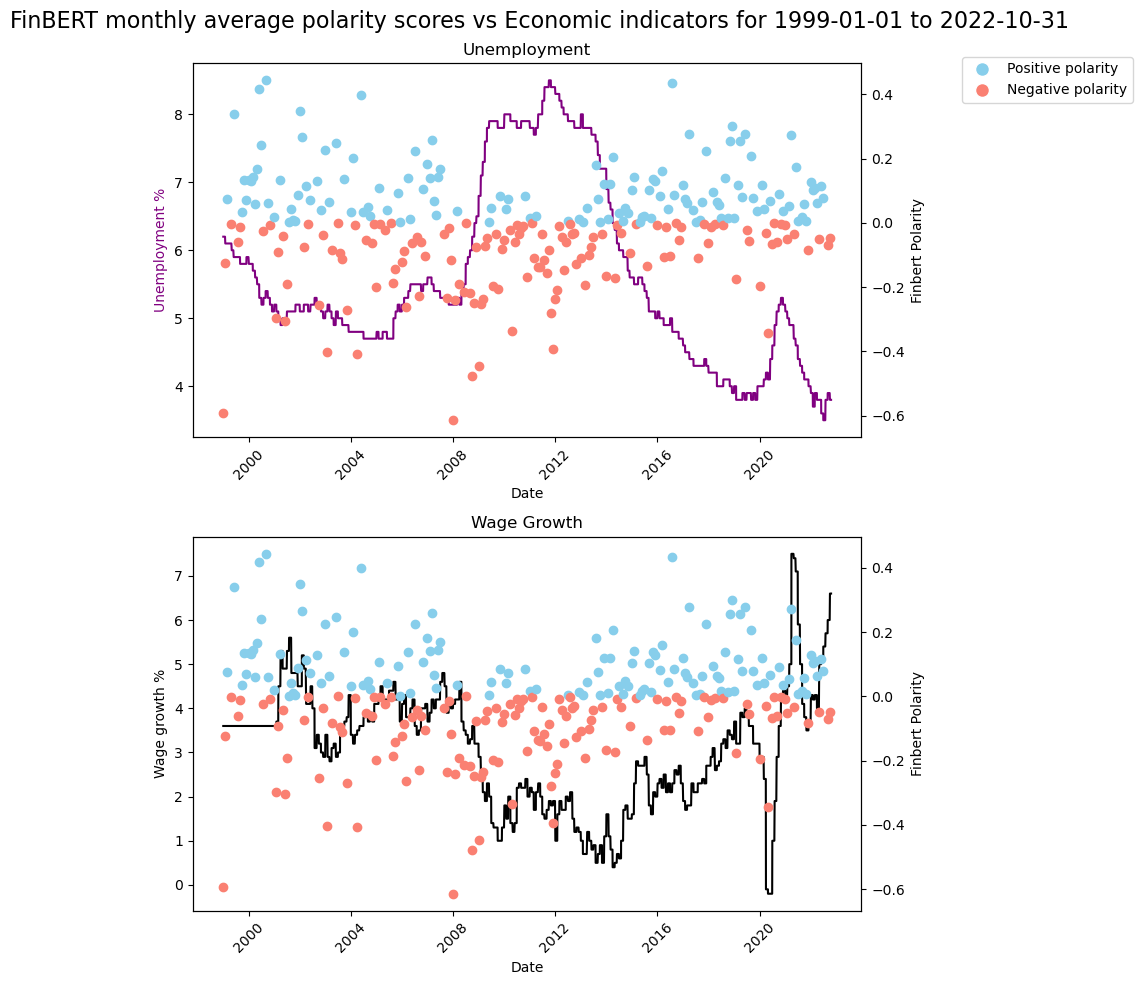

In [55]:
# Create a function to compare the monthly average FinBERT scores with the economic indicators
def plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, start_date, end_date):
    # Filter eco_monthly dataframe by the selected time frame
    eco_monthly_filtered = eco_monthly.loc[start_date:end_date]

    # Calculate the monthly average of finbert_polarity
    monthly_finbert_polarity = fin_speech_unique.resample('M').mean()

    # Reindex monthly_finbert_polarity to include only the dates present between the start and end dates
    monthly_finbert_polarity = monthly_finbert_polarity.reindex(pd.date_range(start=start_date, end=end_date, freq='M'))

    # Resample to the start of each month and take the first value
    monthly_finbert_polarity_resampled = monthly_finbert_polarity.resample('MS').first()

    # Filter monthly_finbert_polarity_resampled to include only the selected time frame
    monthly_finbert_polarity_filtered = monthly_finbert_polarity_resampled.loc[start_date:end_date]

    # Create figures and axes
    fig, axs = plt.subplots(2, 1, figsize=(8, 10))

    # List of columns to plot
    columns_to_plot = ['unemployment', 'wage_growth']
    colors = ['purple', 'black']

    # Define y-axis labels
    y_labels = ['Unemployment %', 'Wage growth %']

    # Plot each eco indicator against FinBERT polarity
    for i, (col, color, ax, y_label) in enumerate(zip(columns_to_plot, colors, axs.flatten(), y_labels)):
        ax.plot(eco_monthly_filtered.index, eco_monthly_filtered[col], color=color, label=col)
        ax.set_xlabel('Date')
        ax.set_ylabel(y_label, color=color)

        # Rotate x-axis tick labels by 45 degrees
        ax.tick_params(axis='x', rotation=45)

        # Create secondary y-axis for FinBERT polarity
        ax2 = ax.twinx()
        ax2.set_ylabel('Finbert Polarity')

        # Plot the monthly average FinBERT polarity
        for date, row in monthly_finbert_polarity_filtered.iterrows():
            color = 'skyblue' if row['finbert_polarity'] >= 0 else 'salmon'
            ax2.scatter(date, row['finbert_polarity'], color=color)

    # Add individual plot titles
    axs[0].set_title('Unemployment')
    axs[1].set_title('Wage Growth')

    # Add a common title with a larger font size
    plt.suptitle(f'FinBERT monthly average polarity scores vs Economic indicators for {start_date} to {end_date}', fontsize=16)

    # Adjust the spacing between the main title and subplots
    plt.subplots_adjust(top=0.9)

    # Add legend
    red_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='salmon', markersize=10, label='Negative polarity')
    green_dot = plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='skyblue', markersize=10, label='Positive polarity')
    fig.legend(handles=[green_dot, red_dot], loc='upper left', bbox_to_anchor=(1.02, 0.94))

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

# Example usage:
plot_finbert_polarity_vs_eco_indicators(fin_speech_unique, eco_monthly, '1999-01-01', '2022-10-31')

In [56]:
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

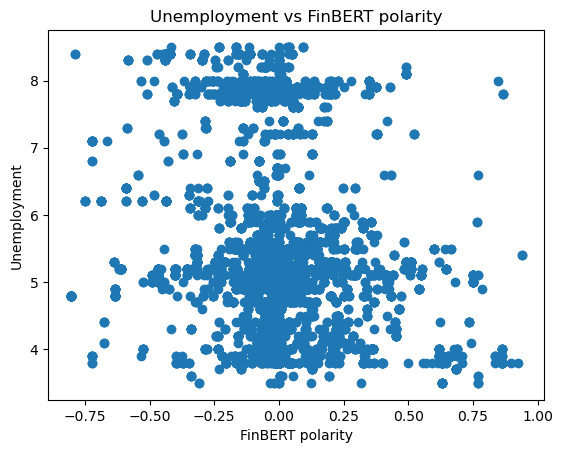

In [57]:
# Independent variable.
x = eco_monthly['finbert_polarity']

# Dependent variable.
y = eco_monthly['unemployment']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Set the title and labels
plt.ylabel('Unemployment')
plt.xlabel('FinBERT polarity')
plt.title('Unemployment vs FinBERT polarity')

# Display the plot
plt.show()

In [58]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = eco_monthly).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     300.7
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           8.44e-66
Time:                        14:23:23   Log-Likelihood:                -10276.
No. Observations:                6126   AIC:                         2.056e+04
Df Residuals:                    6124   BIC:                         2.057e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.5865      0.017    337.510      0.000       5.554       5.619
x             -1.1476      0.066    -17.341      0.000      -1.277      -1.018
==============================================================================
Omnibus:                      584.488   Durbin-Watson:                   0.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              604.172
Skew:                           0.718   Prob(JB):                    6.39e-132
Kurtosis:                       2.447   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

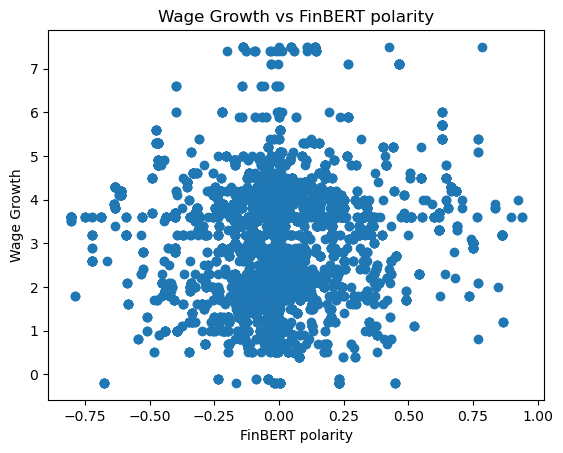

In [59]:
# Independent variable.
x = eco_monthly['finbert_polarity']

# Dependent variable.
y = eco_monthly['wage_growth']

# Check for linearity with Matplotlib.
plt.scatter(x, y)

# Set the title and labels
plt.ylabel('Wage Growth')
plt.xlabel('FinBERT polarity')
plt.title('Wage Growth vs FinBERT polarity')

# Display the plot
plt.show()

In [60]:
# OLS model and summary.
f = 'y ~ x'
test = ols(f, data = eco_monthly).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     49.06
Date:                Wed, 17 Apr 2024   Prob (F-statistic):           2.75e-12
Time:                        14:23:23   Log-Likelihood:                -10418.
No. Observations:                6126   AIC:                         2.084e+04
Df Residuals:                    6124   BIC:                         2.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0464      0.017    179.831      0.000       3.013       3.080
x              0.4744      0.068      7.004      0.000       0.342       0.607
==============================================================================
Omnibus:                       21.925   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.077
Skew:                           0.119   Prob(JB):                     9.75e-06
Kurtosis:                       3.184   Cond. No.                         4.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

A quick look was had into linear regression for both Unemployment and Wage growth and there is a slight correlation at 4.7% for Unemployment but nothing significant to make any conclusion that the speeches have any significant influence on the economic indicators. 